<img src = 'a.jpg'>

# Importing Needed Libraries

In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
from imblearn.over_sampling import SMOTE
import dask.dataframe as dd
import dask
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold,StratifiedKFold, StratifiedShuffleSplit
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, roc_auc_score, auc, classification_report
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import roc_auc_score
from catboost import Pool
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import time
%matplotlib inline
pd.set_option('display.max_columns', 100)
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 10
import script

# Importing the dataset

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [3]:
train.head(7)

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.0000,0.0,10689720.0,252072.0,4272776.0,11333126.0,4397256.0,2301324.0,7875694.0,96375139,112181765.0,1.0,1.0,1.0,3.0,3.0,134.655,NaN,NaN,134.655,4000.5,17064.0,11376.0,60.0,17064.0,5962.0,NaN,1052.0,8.0000,2.0,NaN,12.0,12.0,4.0,0.0,NaN,NaN,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.0000,0.0,898979.0,497531.0,9073814.0,2533168.0,244292.0,3982971.0,2141445.0,28141427,45169902.0,1.0,1.0,1.0,2.0,2.0,109.230,11385.24,14584.29,86.685,4161.0,13413.0,8942.0,304.0,13413.0,5780.0,NaN,2554.0,17.5000,0.0,0.0,16.0,24.0,8.0,0.0,NaN,NaN,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.2820,NaN,956940.0,NaN,192944.0,1079864.0,NaN,NaN,0.0,16576457,22452691.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1597.5,4746.0,3164.0,60.0,15696.0,NaN,14508.0,70.0,0.6666,0.0,NaN,12.0,0.0,6.0,0.0,149.6805,NaN,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.0000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,NaN,771776.0,1186839.0,48187375,136297820.0,0.0,0.0,0.0,1.0,1.0,120.120,8580.00,0.00,85.800,1701.0,4014.0,2676.0,60.0,11679.0,NaN,NaN,522.0,7.8334,1.0,1.0,4.0,8.0,4.0,1.0,NaN,NaN,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.0000,1556.0,214728.0,214728.0,1284089.0,361770.0,396391.0,818456.0,511535.0,28141427,15292757.0,0.0,0.0,0.0,3.0,3.0,104.535,8360.19,10326.45,115.335,1551.0,3285.0,2190.0,60.0,19437.0,12958.0,5202.0,272.0,1.0000,0.0,0.0,24.0,2.0,24.0,0.0,150.0135,NaN,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no
5,Apcnt_1000020,3724.0,NaN,0.0000,0.0,0.0000,192944.0,9244585.0,6761209.0,67963357.0,32902009.0,NaN,976390.0,2114215.0,16576457,NaN,0.0,0.0,0.0,0.0,0.0,8.385,NaN,NaN,4.845,2590.5,22083.0,14722.0,3772.0,22083.0,NaN,NaN,3858.0,31.0000,0.0,NaN,10.0,60.0,0.0,0.0,NaN,NaN,0.030558,12.12,0.382960,NaN,0.0,lending,NaN,0.000000,NaN,no
6,Apcnt_1000024,3350.0,0.24205,0.3132,0.0,2.8188,NaN,580388.0,NaN,96472.0,580388.0,631347.0,NaN,0.0,21973443,91602498.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,822.0,NaN,NaN,426.0,13413.0,NaN,13413.0,36.0,14.3334,0.0,NaN,12.0,2.0,2.0,0.0,153.8745,NaN,0.660000,1.01,0.513504,NaN,0.0,charge,NaN,2.146512,0.004390,yes


In [4]:
test.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,0.0,1649749.0,5446.0,0.0,48187375,114686147.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1086.0,6204.0,2676.0,60.0,14691.0,9794.0,NaN,238.0,1.8334,0.0,NaN,22.0,2.0,14.0,0.0,NaN,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,18308285.0,622789.0,1025793.0,1396510.0,34694910,87479487.0,1.0,1.0,1.0,2.0,2.0,142.560,NaN,NaN,570.585,3082.5,10221.0,6814.0,60.0,11955.0,3528.0,NaN,1216.0,19.5000,3.0,NaN,30.0,18.0,14.0,2.0,NaN,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,0.0,118256.0,NaN,NaN,21973443,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,852.0,4836.0,NaN,NaN,NaN,7.8334,0.0,NaN,2.0,NaN,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,493641.0,1391064.0,1176725.0,1220293.0,16576457,NaN,2.0,2.0,2.0,3.0,3.0,109.005,13050.00,NaN,109.005,1414.5,4197.0,2798.0,60.0,14964.0,NaN,NaN,248.0,9.0000,1.0,1.0,36.0,0.0,26.0,0.0,NaN,NaN,0.916663,2.02,0.464224,NaN,NaN,charge,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,5752921.0,271133.0,613064.0,4779643.0,48187375,72049802.0,0.0,0.0,0.0,3.0,3.0,139.065,469.29,469.29,15.180,2724.0,9855.0,6570.0,182.0,11679.0,5900.0,NaN,2388.0,16.6666,1.0,0.0,24.0,28.0,20.0,0.0,NaN,NaN,0.234047,23.23,0.726688,0.0,0.0,lending,1303.587148,1.637733,0.163124


# Encoding the categorical variables

In [5]:
train["form_field47"] = LabelEncoder().fit_transform(train["form_field47"])
test["form_field47"] = LabelEncoder().fit_transform(test["form_field47"])
#Encoding the target variabe
train["default_status"] = LabelEncoder().fit_transform(train["default_status"])

# Removing Unwanted Columns

In [6]:
train_id = train.Applicant_ID
test_id = test.Applicant_ID
target = train.default_status

In [7]:
train.columns

Index(['Applicant_ID', 'form_field1', 'form_field2', 'form_field3',
       'form_field4', 'form_field5', 'form_field6', 'form_field7',
       'form_field8', 'form_field9', 'form_field10', 'form_field11',
       'form_field12', 'form_field13', 'form_field14', 'form_field15',
       'form_field16', 'form_field17', 'form_field18', 'form_field19',
       'form_field20', 'form_field21', 'form_field22', 'form_field23',
       'form_field24', 'form_field25', 'form_field26', 'form_field27',
       'form_field28', 'form_field29', 'form_field30', 'form_field31',
       'form_field32', 'form_field33', 'form_field34', 'form_field35',
       'form_field36', 'form_field37', 'form_field38', 'form_field39',
       'form_field40', 'form_field41', 'form_field42', 'form_field43',
       'form_field44', 'form_field45', 'form_field46', 'form_field47',
       'form_field48', 'form_field49', 'form_field50', 'default_status'],
      dtype='object')

In [8]:
train.drop(['Applicant_ID','default_status'],axis= 1, inplace = True)
test.drop(['Applicant_ID'], axis = 1, inplace = True)

In [9]:
%matplotlib inline
pd.set_option('display.max_columns', 100)
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 10

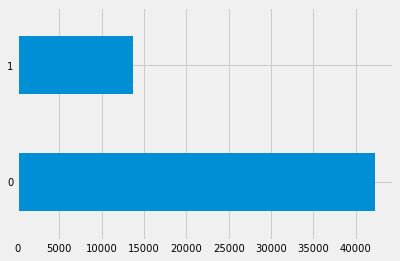

In [10]:
target.value_counts().plot(kind="barh")
plt.show()

# Feature Selection

In [11]:
from script import FeatureSelector
fs = FeatureSelector(data = train, labels = target)

In [12]:
fs.identify_missing(missing_threshold=0.6)

3 features with greater than 0.60 missing values.



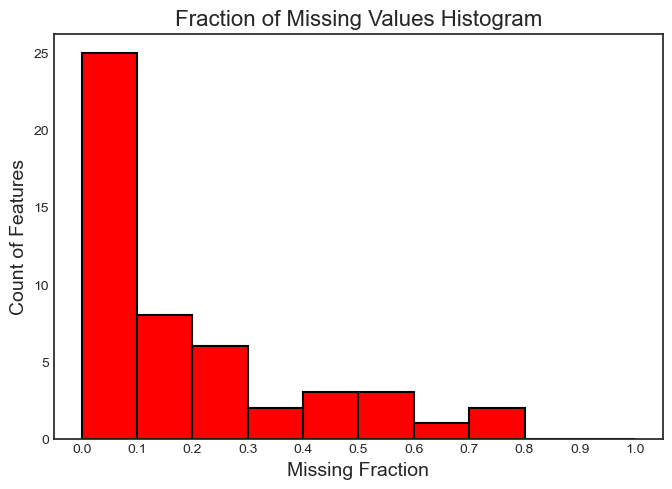

In [13]:
missing_features = fs.ops['missing']
missing_features[:10]
fs.plot_missing()

In [14]:
fs.missing_stats.head(10)

,missing_fraction
form_field40,0.780875
form_field31,0.703714
form_field41,0.682661
form_field11,0.561089
form_field45,0.559232
form_field23,0.502196
form_field30,0.455518
form_field35,0.413357
form_field15,0.401339
form_field48,0.373018


0 features with a single unique value.



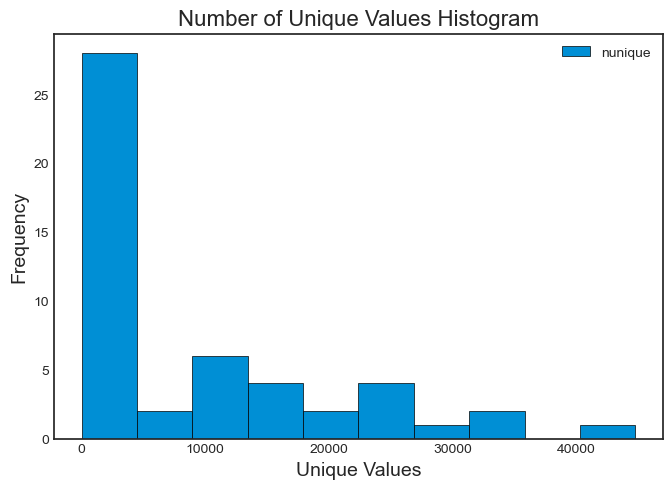

In [15]:
fs.identify_single_unique()
single_unique = fs.ops['single_unique']
fs.plot_unique()

In [16]:
fs.unique_stats.sample(5)

,nunique
form_field35,11
form_field19,26
form_field25,5014
form_field13,21960
form_field22,23583


25 features with a correlation magnitude greater than 0.50.

we have no single co-linear feature as per threshold


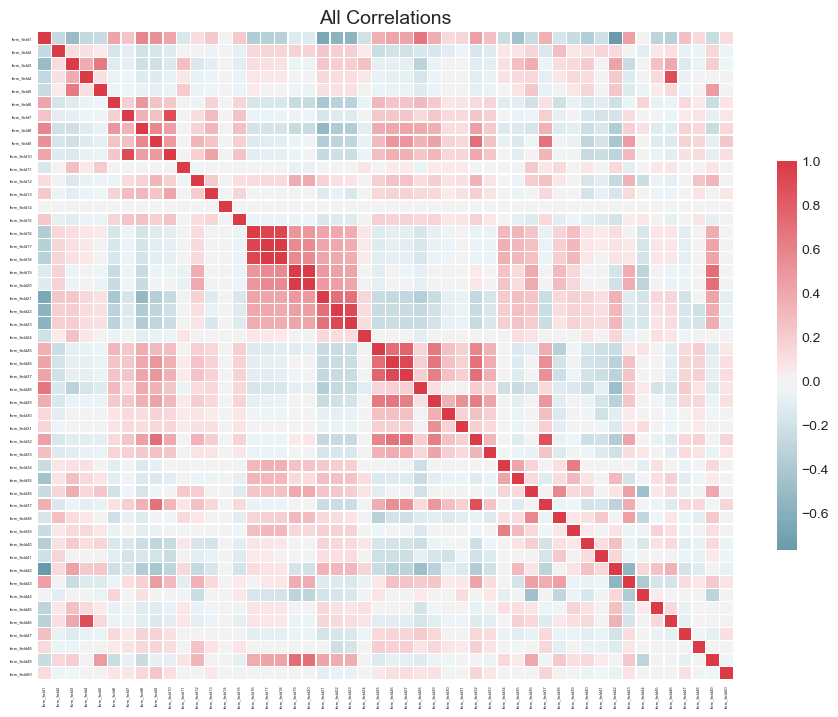

In [17]:
fs.identify_collinear(correlation_threshold=0.5)
correlated_features = fs.ops['collinear']
correlated_features[:5]
print("we have no single co-linear feature as per threshold")
fs.plot_collinear(plot_all=True)

In [18]:
fs.record_collinear.head()

,drop_feature,corr_feature,corr_value
0,form_field3,form_field1,-0.501989
1,form_field5,form_field3,0.649863
2,form_field8,form_field1,0.590875
3,form_field9,form_field1,0.525935
4,form_field9,form_field8,0.583663


In [19]:
'''
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
train_features, test_features, train_labels, test_labels = train_test_split(train,target,test_size=0.2,
    random_state=41)
correlated_features = set()
correlation_matrix = x_train.corr()
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
'''

'\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.feature_selection import VarianceThreshold\ntrain_features, test_features, train_labels, test_labels = train_test_split(train,target,test_size=0.2,\n    random_state=41)\ncorrelated_features = set()\ncorrelation_matrix = x_train.corr()\nfor i in range(len(correlation_matrix .columns)):\n    for j in range(i):\n        if abs(correlation_matrix.iloc[i, j]) > 0.8:\n            colname = correlation_matrix.columns[i]\n            correlated_features.add(colname)\n'

In [20]:
'''
train_features.drop(labels=correlated_features, axis=1, inplace=True)
test_features.drop(labels=correlated_features, axis=1, inplace=True)

train_features.shape, test_features.shape
train_features.columns
'''

'\ntrain_features.drop(labels=correlated_features, axis=1, inplace=True)\ntest_features.drop(labels=correlated_features, axis=1, inplace=True)\n\ntrain_features.shape, test_features.shape\ntrain_features.columns\n'

In [21]:
fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', n_iterations = 50, early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[163]	valid_0's auc: 0.843157	valid_0's binary_logloss: 0.402419
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[173]	valid_0's auc: 0.836934	valid_0's binary_logloss: 0.408565
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[195]	valid_0's auc: 0.850868	valid_0's binary_logloss: 0.391193
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[232]	valid_0's auc: 0.839488	valid_0's binary_logloss: 0.40058
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[256]	valid_0's auc: 0.848741	valid_0's binary_logloss: 0.396339
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[155]	valid_0's auc: 0.840979	valid_0's binary_logloss: 0.40

In [22]:
one_hot_features = fs.one_hot_features
base_features = fs.base_features
print('There are %d original features' % len(base_features))
print('There are %d one-hot features' % len(one_hot_features))

There are 50 original features
There are 0 one-hot features


In [23]:
fs.data_all.head(10)

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,3436.0,0.28505,1.6560,0.0,0.0000,0.0,10689720.0,252072.0,4272776.0,11333126.0,4397256.0,2301324.0,7875694.0,96375139,112181765.0,1.0,1.0,1.0,3.0,3.0,134.655,NaN,NaN,134.655,4000.5,17064.0,11376.0,60.0,17064.0,5962.0,NaN,1052.0,8.0000,2.0,NaN,12.0,12.0,4.0,0.0,NaN,NaN,0.392854,2.02,0.711632,0.0,0.0,0,NaN,1.129518,0.044335
1,3456.0,0.67400,0.2342,0.0,0.0000,0.0,898979.0,497531.0,9073814.0,2533168.0,244292.0,3982971.0,2141445.0,28141427,45169902.0,1.0,1.0,1.0,2.0,2.0,109.230,11385.240,14584.29,86.685,4161.0,13413.0,8942.0,304.0,13413.0,5780.0,NaN,2554.0,17.5000,0.0,0.0,16.0,24.0,8.0,0.0,NaN,NaN,0.314281,8.08,0.183584,NaN,0.0,0,349.805730,1.620483,0.322436
2,3276.0,0.53845,3.1510,0.0,6.2820,NaN,956940.0,NaN,192944.0,1079864.0,NaN,NaN,0.0,16576457,22452691.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1597.5,4746.0,3164.0,60.0,15696.0,NaN,14508.0,70.0,0.6666,0.0,NaN,12.0,0.0,6.0,0.0,149.6805,NaN,0.162965,18.18,0.791136,0.0,0.0,0,NaN,1.513370,0.011640
3,3372.0,0.17005,0.5050,0.0,0.0000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,NaN,771776.0,1186839.0,48187375,136297820.0,0.0,0.0,0.0,1.0,1.0,120.120,8580.000,0.00,85.800,1701.0,4014.0,2676.0,60.0,11679.0,NaN,NaN,522.0,7.8334,1.0,1.0,4.0,8.0,4.0,1.0,NaN,NaN,0.488884,2.02,0.685168,NaN,0.0,0,89.940100,0.664452,0.082729
4,3370.0,0.77270,1.1010,0.0,0.0000,1556.0,214728.0,214728.0,1284089.0,361770.0,396391.0,818456.0,511535.0,28141427,15292757.0,0.0,0.0,0.0,3.0,3.0,104.535,8360.190,10326.45,115.335,1551.0,3285.0,2190.0,60.0,19437.0,12958.0,5202.0,272.0,1.0000,0.0,0.0,24.0,2.0,24.0,0.0,150.0135,NaN,0.275000,12.12,0.438168,0.0,0.0,0,97.887502,1.427891,0.045630
5,3724.0,NaN,0.0000,0.0,0.0000,192944.0,9244585.0,6761209.0,67963357.0,32902009.0,NaN,976390.0,2114215.0,16576457,NaN,0.0,0.0,0.0,0.0,0.0,8.385,NaN,NaN,4.845,2590.5,22083.0,14722.0,3772.0,22083.0,NaN,NaN,3858.0,31.0000,0.0,NaN,10.0,60.0,0.0,0.0,NaN,NaN,0.030558,12.12,0.382960,NaN,0.0,1,NaN,0.000000,NaN
6,3350.0,0.24205,0.3132,0.0,2.8188,NaN,580388.0,NaN,96472.0,580388.0,631347.0,NaN,0.0,21973443,91602498.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,822.0,NaN,NaN,426.0,13413.0,NaN,13413.0,36.0,14.3334,0.0,NaN,12.0,2.0,2.0,0.0,153.8745,NaN,0.660000,1.01,0.513504,NaN,0.0,0,NaN,2.146512,0.004390
7,3416.0,0.87020,0.0570,0.0,0.0000,17505.0,186331.0,186331.0,1484813.0,326760.0,50959.0,1284089.0,5633109.0,11564970,18211813.0,0.0,0.0,0.0,1.0,1.0,124.980,8267.655,7755.00,82.680,1498.5,1734.0,1156.0,548.0,15240.0,182.0,NaN,460.0,5.5000,0.0,1.0,10.0,6.0,12.0,0.0,NaN,149.0190,0.137500,3.03,0.635960,NaN,0.0,0,155.295994,0.946074,0.128389
8,3376.0,0.29180,0.5586,0.0,0.0000,18283.0,1105149.0,18283.0,115533.0,1557167.0,752715.0,97639.0,427511.0,11564970,NaN,0.0,0.0,0.0,1.0,2.0,126.495,NaN,NaN,126.495,1597.5,3195.0,2130.0,182.0,3741.0,1034.0,NaN,70.0,34.8334,1.0,NaN,14.0,0.0,8.0,0.0,NaN,102.2625,0.471427,4.04,0.410880,0.0,0.0,0,NaN,0.641601,0.009990
9,3310.0,0.24395,0.1562,0.0,0.0000,NaN,0.0,NaN,NaN,0.0,208115.0,NaN,NaN,11564970,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,502.5,1278.0,852.0,182.0,9126.0,NaN,273.0,22.0,4.1666,0.0,1.0,4.0,0.0,4.0,0.0,150.0000,NaN,0.825000,1.01,0.800000,NaN,NaN,0,NaN,0.000000,NaN


In [24]:
zero_importance_features = fs.ops['zero_importance']
zero_importance_features[10:15]

[]

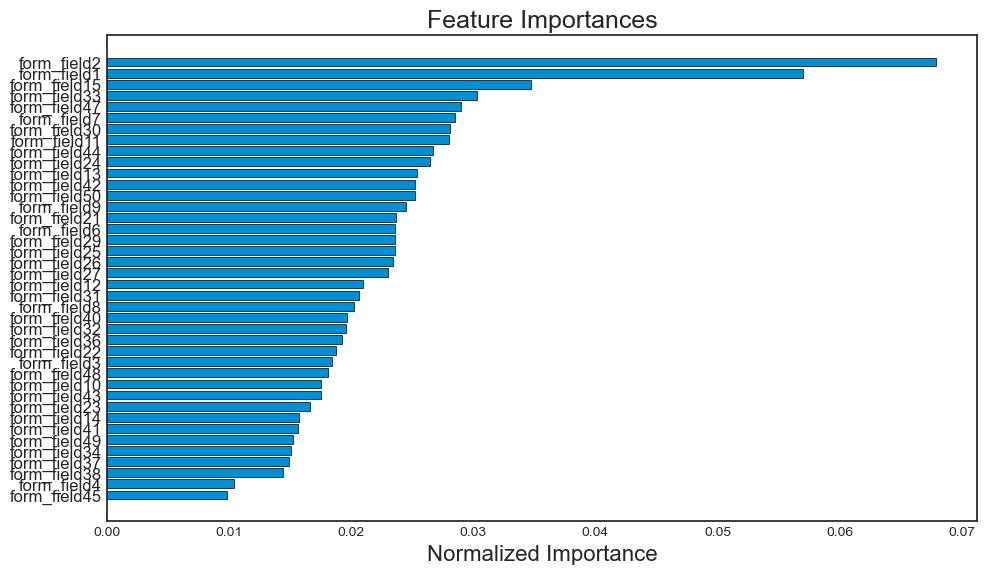

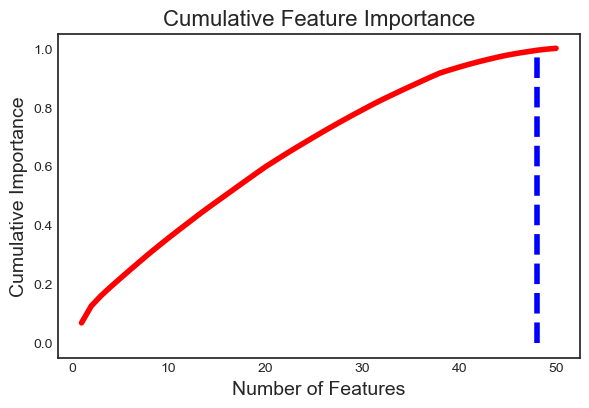

48 features required for 0.99 of cumulative importance


In [25]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 40)

In [26]:
fs.feature_importances.head(51)

,feature,importance,normalized_importance,cumulative_importance
0,form_field2,438.06,0.067853,0.067853
1,form_field1,367.78,0.056967,0.124820
2,form_field15,224.26,0.034737,0.159557
3,form_field33,195.62,0.030300,0.189857
4,form_field47,186.98,0.028962,0.218820
5,form_field7,184.24,0.028538,0.247357
6,form_field30,181.58,0.028126,0.275483
7,form_field11,181.02,0.028039,0.303522
8,form_field44,172.16,0.026667,0.330189
9,form_field24,170.60,0.026425,0.356614


In [27]:
one_hundred_features = list(fs.feature_importances.loc[:99, 'feature'])
len(one_hundred_features)

50

In [28]:
fs.identify_low_importance(cumulative_importance = 0.99)

47 features required for cumulative importance of 0.99 after one hot encoding.
3 features do not contribute to cumulative importance of 0.99.



In [29]:
low_importance_features = fs.ops['low_importance']
low_importance_features[:5]

['form_field17', 'form_field16', 'form_field39']

In [30]:
train_no_missing = fs.remove(methods = ['missing'])

Removed 3 features.


In [31]:
train_no_missing_zero = fs.remove(methods = ['missing', 'zero_importance'])

Removed 3 features.


In [32]:
train_no_missing_zero.shape

(56000, 47)

In [33]:
train.columns

Index(['form_field1', 'form_field2', 'form_field3', 'form_field4',
       'form_field5', 'form_field6', 'form_field7', 'form_field8',
       'form_field9', 'form_field10', 'form_field11', 'form_field12',
       'form_field13', 'form_field14', 'form_field15', 'form_field16',
       'form_field17', 'form_field18', 'form_field19', 'form_field20',
       'form_field21', 'form_field22', 'form_field23', 'form_field24',
       'form_field25', 'form_field26', 'form_field27', 'form_field28',
       'form_field29', 'form_field30', 'form_field31', 'form_field32',
       'form_field33', 'form_field34', 'form_field35', 'form_field36',
       'form_field37', 'form_field38', 'form_field39', 'form_field40',
       'form_field41', 'form_field42', 'form_field43', 'form_field44',
       'form_field45', 'form_field46', 'form_field47', 'form_field48',
       'form_field49', 'form_field50'],
      dtype='object')

# Model Building

In [34]:
X = train.copy()
test = test.copy()
y = target.copy()

In [35]:
predicted_score = []
test_prediction = []
splits = None
skf = StratifiedKFold(n_splits = 5,shuffle=True,random_state=200)

for train_index,test_index in skf.split(X,y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    
    classifier = CatBoostClassifier(iterations=1750, learning_rate=0.01, l2_leaf_reg=3.5, depth=8, rsm=0.98, loss_function= 'Logloss', eval_metric='AUC',use_best_model=True,random_seed=52)
    classifier.fit(X_train,y_train, eval_set=[(X_train,y_train),(X_test,y_test)],
           early_stopping_rounds=100,verbose=True)
    
    predicted_score = classifier.predict_proba(X_test)[:,1]
    
    
    
    pred = classifier.predict_proba(test[X.columns])[:,1]
    
    test_prediction.append(pred)

0:	test: 0.8006073	test1: 0.7947547	best: 0.7947547 (0)	total: 246ms	remaining: 7m 10s
1:	test: 0.8161517	test1: 0.8109966	best: 0.8109966 (1)	total: 281ms	remaining: 4m 5s
2:	test: 0.8122228	test1: 0.8097184	best: 0.8109966 (1)	total: 296ms	remaining: 2m 52s
3:	test: 0.8145032	test1: 0.8117478	best: 0.8117478 (3)	total: 332ms	remaining: 2m 24s
4:	test: 0.8156797	test1: 0.8121205	best: 0.8121205 (4)	total: 365ms	remaining: 2m 7s
5:	test: 0.8190035	test1: 0.8153956	best: 0.8153956 (5)	total: 410ms	remaining: 1m 59s
6:	test: 0.8206146	test1: 0.8168354	best: 0.8168354 (6)	total: 443ms	remaining: 1m 50s
7:	test: 0.8199764	test1: 0.8161265	best: 0.8168354 (6)	total: 475ms	remaining: 1m 43s
8:	test: 0.8208084	test1: 0.8172297	best: 0.8172297 (8)	total: 507ms	remaining: 1m 38s
9:	test: 0.8208317	test1: 0.8173566	best: 0.8173566 (9)	total: 540ms	remaining: 1m 33s
10:	test: 0.8218725	test1: 0.8183888	best: 0.8183888 (10)	total: 572ms	remaining: 1m 30s
11:	test: 0.8225621	test1: 0.8189909	best: 

97:	test: 0.8367410	test1: 0.8285143	best: 0.8285143 (97)	total: 3.73s	remaining: 1m 2s
98:	test: 0.8368157	test1: 0.8285709	best: 0.8285709 (98)	total: 3.77s	remaining: 1m 2s
99:	test: 0.8368665	test1: 0.8285868	best: 0.8285868 (99)	total: 3.8s	remaining: 1m 2s
100:	test: 0.8369567	test1: 0.8286617	best: 0.8286617 (100)	total: 3.84s	remaining: 1m 2s
101:	test: 0.8370630	test1: 0.8287418	best: 0.8287418 (101)	total: 3.87s	remaining: 1m 2s
102:	test: 0.8371586	test1: 0.8288382	best: 0.8288382 (102)	total: 3.91s	remaining: 1m 2s
103:	test: 0.8372557	test1: 0.8288940	best: 0.8288940 (103)	total: 3.94s	remaining: 1m 2s
104:	test: 0.8373495	test1: 0.8289568	best: 0.8289568 (104)	total: 3.98s	remaining: 1m 2s
105:	test: 0.8374146	test1: 0.8289623	best: 0.8289623 (105)	total: 4.01s	remaining: 1m 2s
106:	test: 0.8374956	test1: 0.8289855	best: 0.8289855 (106)	total: 4.04s	remaining: 1m 2s
107:	test: 0.8375966	test1: 0.8289908	best: 0.8289908 (107)	total: 4.08s	remaining: 1m 1s
108:	test: 0.8376

191:	test: 0.8432010	test1: 0.8319235	best: 0.8319235 (191)	total: 6.94s	remaining: 56.3s
192:	test: 0.8432356	test1: 0.8319307	best: 0.8319307 (192)	total: 6.97s	remaining: 56.3s
193:	test: 0.8432708	test1: 0.8319390	best: 0.8319390 (193)	total: 7.01s	remaining: 56.2s
194:	test: 0.8433128	test1: 0.8319538	best: 0.8319538 (194)	total: 7.04s	remaining: 56.2s
195:	test: 0.8433869	test1: 0.8319544	best: 0.8319544 (195)	total: 7.09s	remaining: 56.2s
196:	test: 0.8434455	test1: 0.8319562	best: 0.8319562 (196)	total: 7.13s	remaining: 56.2s
197:	test: 0.8435055	test1: 0.8319688	best: 0.8319688 (197)	total: 7.16s	remaining: 56.1s
198:	test: 0.8435633	test1: 0.8319887	best: 0.8319887 (198)	total: 7.19s	remaining: 56s
199:	test: 0.8436144	test1: 0.8320116	best: 0.8320116 (199)	total: 7.22s	remaining: 56s
200:	test: 0.8436646	test1: 0.8320376	best: 0.8320376 (200)	total: 7.25s	remaining: 55.9s
201:	test: 0.8437117	test1: 0.8320597	best: 0.8320597 (201)	total: 7.29s	remaining: 55.8s
202:	test: 0.8

284:	test: 0.8481634	test1: 0.8335341	best: 0.8335341 (284)	total: 10.1s	remaining: 52s
285:	test: 0.8482012	test1: 0.8335504	best: 0.8335504 (285)	total: 10.1s	remaining: 51.9s
286:	test: 0.8482282	test1: 0.8335624	best: 0.8335624 (286)	total: 10.2s	remaining: 51.9s
287:	test: 0.8482712	test1: 0.8335959	best: 0.8335959 (287)	total: 10.2s	remaining: 51.8s
288:	test: 0.8483133	test1: 0.8336081	best: 0.8336081 (288)	total: 10.2s	remaining: 51.8s
289:	test: 0.8483665	test1: 0.8336319	best: 0.8336319 (289)	total: 10.3s	remaining: 51.8s
290:	test: 0.8484395	test1: 0.8336604	best: 0.8336604 (290)	total: 10.3s	remaining: 51.7s
291:	test: 0.8484764	test1: 0.8336642	best: 0.8336642 (291)	total: 10.3s	remaining: 51.7s
292:	test: 0.8485240	test1: 0.8337043	best: 0.8337043 (292)	total: 10.4s	remaining: 51.6s
293:	test: 0.8485834	test1: 0.8337462	best: 0.8337462 (293)	total: 10.4s	remaining: 51.6s
294:	test: 0.8486310	test1: 0.8337511	best: 0.8337511 (294)	total: 10.4s	remaining: 51.5s
295:	test: 0

377:	test: 0.8523579	test1: 0.8348417	best: 0.8348417 (377)	total: 13.3s	remaining: 48.2s
378:	test: 0.8524217	test1: 0.8348697	best: 0.8348697 (378)	total: 13.3s	remaining: 48.2s
379:	test: 0.8524569	test1: 0.8348820	best: 0.8348820 (379)	total: 13.4s	remaining: 48.1s
380:	test: 0.8525041	test1: 0.8348958	best: 0.8348958 (380)	total: 13.4s	remaining: 48.1s
381:	test: 0.8525477	test1: 0.8349064	best: 0.8349064 (381)	total: 13.4s	remaining: 48.1s
382:	test: 0.8525803	test1: 0.8349270	best: 0.8349270 (382)	total: 13.5s	remaining: 48s
383:	test: 0.8526279	test1: 0.8349517	best: 0.8349517 (383)	total: 13.5s	remaining: 48s
384:	test: 0.8526575	test1: 0.8349706	best: 0.8349706 (384)	total: 13.5s	remaining: 47.9s
385:	test: 0.8526952	test1: 0.8349961	best: 0.8349961 (385)	total: 13.5s	remaining: 47.9s
386:	test: 0.8527494	test1: 0.8350048	best: 0.8350048 (386)	total: 13.6s	remaining: 47.8s
387:	test: 0.8527934	test1: 0.8350153	best: 0.8350153 (387)	total: 13.6s	remaining: 47.8s
388:	test: 0.8

470:	test: 0.8563913	test1: 0.8358012	best: 0.8358012 (470)	total: 16.4s	remaining: 44.6s
471:	test: 0.8564533	test1: 0.8358204	best: 0.8358204 (471)	total: 16.5s	remaining: 44.6s
472:	test: 0.8564929	test1: 0.8358386	best: 0.8358386 (472)	total: 16.5s	remaining: 44.6s
473:	test: 0.8565231	test1: 0.8358306	best: 0.8358386 (472)	total: 16.6s	remaining: 44.6s
474:	test: 0.8565645	test1: 0.8358390	best: 0.8358390 (474)	total: 16.6s	remaining: 44.5s
475:	test: 0.8566145	test1: 0.8358452	best: 0.8358452 (475)	total: 16.6s	remaining: 44.5s
476:	test: 0.8566320	test1: 0.8358465	best: 0.8358465 (476)	total: 16.6s	remaining: 44.4s
477:	test: 0.8566797	test1: 0.8358496	best: 0.8358496 (477)	total: 16.7s	remaining: 44.4s
478:	test: 0.8567152	test1: 0.8358575	best: 0.8358575 (478)	total: 16.7s	remaining: 44.4s
479:	test: 0.8567450	test1: 0.8358635	best: 0.8358635 (479)	total: 16.8s	remaining: 44.3s
480:	test: 0.8567765	test1: 0.8358828	best: 0.8358828 (480)	total: 16.8s	remaining: 44.3s
481:	test:

566:	test: 0.8600602	test1: 0.8365488	best: 0.8365488 (566)	total: 19.7s	remaining: 41.2s
567:	test: 0.8601094	test1: 0.8365612	best: 0.8365612 (567)	total: 19.8s	remaining: 41.2s
568:	test: 0.8601341	test1: 0.8365691	best: 0.8365691 (568)	total: 19.8s	remaining: 41.1s
569:	test: 0.8601480	test1: 0.8365765	best: 0.8365765 (569)	total: 19.8s	remaining: 41.1s
570:	test: 0.8602051	test1: 0.8365829	best: 0.8365829 (570)	total: 19.9s	remaining: 41s
571:	test: 0.8602350	test1: 0.8365793	best: 0.8365829 (570)	total: 19.9s	remaining: 41s
572:	test: 0.8602807	test1: 0.8365930	best: 0.8365930 (572)	total: 19.9s	remaining: 41s
573:	test: 0.8603105	test1: 0.8365953	best: 0.8365953 (573)	total: 20s	remaining: 40.9s
574:	test: 0.8603575	test1: 0.8366174	best: 0.8366174 (574)	total: 20s	remaining: 40.9s
575:	test: 0.8603969	test1: 0.8366237	best: 0.8366237 (575)	total: 20s	remaining: 40.9s
576:	test: 0.8604275	test1: 0.8366423	best: 0.8366423 (576)	total: 20.1s	remaining: 40.8s
577:	test: 0.8604594	t

660:	test: 0.8634070	test1: 0.8370212	best: 0.8370303 (656)	total: 23s	remaining: 37.8s
661:	test: 0.8634390	test1: 0.8370343	best: 0.8370343 (661)	total: 23s	remaining: 37.8s
662:	test: 0.8635078	test1: 0.8370356	best: 0.8370356 (662)	total: 23.1s	remaining: 37.8s
663:	test: 0.8635251	test1: 0.8370346	best: 0.8370356 (662)	total: 23.1s	remaining: 37.7s
664:	test: 0.8635684	test1: 0.8370477	best: 0.8370477 (664)	total: 23.1s	remaining: 37.7s
665:	test: 0.8635770	test1: 0.8370518	best: 0.8370518 (665)	total: 23.1s	remaining: 37.7s
666:	test: 0.8635934	test1: 0.8370603	best: 0.8370603 (666)	total: 23.2s	remaining: 37.6s
667:	test: 0.8636244	test1: 0.8370622	best: 0.8370622 (667)	total: 23.2s	remaining: 37.6s
668:	test: 0.8636625	test1: 0.8370714	best: 0.8370714 (668)	total: 23.2s	remaining: 37.6s
669:	test: 0.8637140	test1: 0.8370822	best: 0.8370822 (669)	total: 23.3s	remaining: 37.5s
670:	test: 0.8637673	test1: 0.8370783	best: 0.8370822 (669)	total: 23.3s	remaining: 37.5s
671:	test: 0.8

754:	test: 0.8666839	test1: 0.8373964	best: 0.8373964 (754)	total: 26.2s	remaining: 34.5s
755:	test: 0.8667213	test1: 0.8373931	best: 0.8373964 (754)	total: 26.2s	remaining: 34.4s
756:	test: 0.8667651	test1: 0.8373985	best: 0.8373985 (756)	total: 26.2s	remaining: 34.4s
757:	test: 0.8667988	test1: 0.8373987	best: 0.8373987 (757)	total: 26.3s	remaining: 34.4s
758:	test: 0.8668252	test1: 0.8374091	best: 0.8374091 (758)	total: 26.3s	remaining: 34.3s
759:	test: 0.8668494	test1: 0.8374178	best: 0.8374178 (759)	total: 26.3s	remaining: 34.3s
760:	test: 0.8668881	test1: 0.8374229	best: 0.8374229 (760)	total: 26.4s	remaining: 34.3s
761:	test: 0.8669108	test1: 0.8374266	best: 0.8374266 (761)	total: 26.4s	remaining: 34.2s
762:	test: 0.8669323	test1: 0.8374232	best: 0.8374266 (761)	total: 26.4s	remaining: 34.2s
763:	test: 0.8669693	test1: 0.8374384	best: 0.8374384 (763)	total: 26.5s	remaining: 34.2s
764:	test: 0.8670177	test1: 0.8374492	best: 0.8374492 (764)	total: 26.5s	remaining: 34.1s
765:	test:

849:	test: 0.8698768	test1: 0.8378939	best: 0.8379061 (843)	total: 29.4s	remaining: 31.1s
850:	test: 0.8699105	test1: 0.8379032	best: 0.8379061 (843)	total: 29.4s	remaining: 31.1s
851:	test: 0.8699481	test1: 0.8379085	best: 0.8379085 (851)	total: 29.4s	remaining: 31s
852:	test: 0.8700012	test1: 0.8379197	best: 0.8379197 (852)	total: 29.5s	remaining: 31s
853:	test: 0.8700378	test1: 0.8379098	best: 0.8379197 (852)	total: 29.5s	remaining: 31s
854:	test: 0.8700672	test1: 0.8379202	best: 0.8379202 (854)	total: 29.5s	remaining: 30.9s
855:	test: 0.8700980	test1: 0.8379239	best: 0.8379239 (855)	total: 29.6s	remaining: 30.9s
856:	test: 0.8701372	test1: 0.8379157	best: 0.8379239 (855)	total: 29.6s	remaining: 30.9s
857:	test: 0.8701583	test1: 0.8379211	best: 0.8379239 (855)	total: 29.6s	remaining: 30.8s
858:	test: 0.8701911	test1: 0.8379258	best: 0.8379258 (858)	total: 29.7s	remaining: 30.8s
859:	test: 0.8702258	test1: 0.8379377	best: 0.8379377 (859)	total: 29.7s	remaining: 30.8s
860:	test: 0.870

941:	test: 0.8726299	test1: 0.8383022	best: 0.8383054 (939)	total: 32.5s	remaining: 27.9s
942:	test: 0.8726567	test1: 0.8383029	best: 0.8383054 (939)	total: 32.6s	remaining: 27.9s
943:	test: 0.8727030	test1: 0.8383037	best: 0.8383054 (939)	total: 32.6s	remaining: 27.8s
944:	test: 0.8727499	test1: 0.8383007	best: 0.8383054 (939)	total: 32.6s	remaining: 27.8s
945:	test: 0.8727792	test1: 0.8383128	best: 0.8383128 (945)	total: 32.7s	remaining: 27.8s
946:	test: 0.8728102	test1: 0.8383056	best: 0.8383128 (945)	total: 32.7s	remaining: 27.7s
947:	test: 0.8728656	test1: 0.8383079	best: 0.8383128 (945)	total: 32.7s	remaining: 27.7s
948:	test: 0.8728844	test1: 0.8383055	best: 0.8383128 (945)	total: 32.8s	remaining: 27.7s
949:	test: 0.8729225	test1: 0.8383131	best: 0.8383131 (949)	total: 32.8s	remaining: 27.6s
950:	test: 0.8729608	test1: 0.8383133	best: 0.8383133 (950)	total: 32.8s	remaining: 27.6s
951:	test: 0.8730010	test1: 0.8383169	best: 0.8383169 (951)	total: 32.9s	remaining: 27.6s
952:	test:

1035:	test: 0.8756071	test1: 0.8385117	best: 0.8385246 (1030)	total: 35.7s	remaining: 24.6s
1036:	test: 0.8756393	test1: 0.8385158	best: 0.8385246 (1030)	total: 35.8s	remaining: 24.6s
1037:	test: 0.8756697	test1: 0.8385107	best: 0.8385246 (1030)	total: 35.8s	remaining: 24.6s
1038:	test: 0.8757029	test1: 0.8385113	best: 0.8385246 (1030)	total: 35.8s	remaining: 24.5s
1039:	test: 0.8757340	test1: 0.8385210	best: 0.8385246 (1030)	total: 35.9s	remaining: 24.5s
1040:	test: 0.8757568	test1: 0.8385233	best: 0.8385246 (1030)	total: 35.9s	remaining: 24.5s
1041:	test: 0.8757795	test1: 0.8385274	best: 0.8385274 (1041)	total: 35.9s	remaining: 24.4s
1042:	test: 0.8758028	test1: 0.8385346	best: 0.8385346 (1042)	total: 36s	remaining: 24.4s
1043:	test: 0.8758609	test1: 0.8385448	best: 0.8385448 (1043)	total: 36s	remaining: 24.3s
1044:	test: 0.8758749	test1: 0.8385425	best: 0.8385448 (1043)	total: 36s	remaining: 24.3s
1045:	test: 0.8759069	test1: 0.8385413	best: 0.8385448 (1043)	total: 36.1s	remaining: 

1125:	test: 0.8786249	test1: 0.8388555	best: 0.8388555 (1125)	total: 38.8s	remaining: 21.5s
1126:	test: 0.8786548	test1: 0.8388607	best: 0.8388607 (1126)	total: 38.8s	remaining: 21.5s
1127:	test: 0.8786821	test1: 0.8388739	best: 0.8388739 (1127)	total: 38.9s	remaining: 21.4s
1128:	test: 0.8787360	test1: 0.8388755	best: 0.8388755 (1128)	total: 38.9s	remaining: 21.4s
1129:	test: 0.8787622	test1: 0.8388817	best: 0.8388817 (1129)	total: 38.9s	remaining: 21.4s
1130:	test: 0.8787893	test1: 0.8388935	best: 0.8388935 (1130)	total: 39s	remaining: 21.3s
1131:	test: 0.8788412	test1: 0.8388986	best: 0.8388986 (1131)	total: 39s	remaining: 21.3s
1132:	test: 0.8788734	test1: 0.8389023	best: 0.8389023 (1132)	total: 39s	remaining: 21.3s
1133:	test: 0.8789075	test1: 0.8389035	best: 0.8389035 (1133)	total: 39.1s	remaining: 21.2s
1134:	test: 0.8789391	test1: 0.8389125	best: 0.8389125 (1134)	total: 39.1s	remaining: 21.2s
1135:	test: 0.8789826	test1: 0.8389208	best: 0.8389208 (1135)	total: 39.2s	remaining: 

1215:	test: 0.8816333	test1: 0.8390546	best: 0.8390674 (1209)	total: 41.9s	remaining: 18.4s
1216:	test: 0.8816771	test1: 0.8390743	best: 0.8390743 (1216)	total: 41.9s	remaining: 18.4s
1217:	test: 0.8817081	test1: 0.8390796	best: 0.8390796 (1217)	total: 42s	remaining: 18.3s
1218:	test: 0.8817473	test1: 0.8390841	best: 0.8390841 (1218)	total: 42s	remaining: 18.3s
1219:	test: 0.8817767	test1: 0.8390843	best: 0.8390843 (1219)	total: 42s	remaining: 18.3s
1220:	test: 0.8818029	test1: 0.8390961	best: 0.8390961 (1220)	total: 42.1s	remaining: 18.2s
1221:	test: 0.8818495	test1: 0.8391022	best: 0.8391022 (1221)	total: 42.1s	remaining: 18.2s
1222:	test: 0.8818892	test1: 0.8391127	best: 0.8391127 (1222)	total: 42.1s	remaining: 18.2s
1223:	test: 0.8819318	test1: 0.8391107	best: 0.8391127 (1222)	total: 42.2s	remaining: 18.1s
1224:	test: 0.8819794	test1: 0.8391085	best: 0.8391127 (1222)	total: 42.2s	remaining: 18.1s
1225:	test: 0.8820224	test1: 0.8391106	best: 0.8391127 (1222)	total: 42.2s	remaining: 

1308:	test: 0.8849777	test1: 0.8392720	best: 0.8392757 (1307)	total: 45.1s	remaining: 15.2s
1309:	test: 0.8850137	test1: 0.8392797	best: 0.8392797 (1309)	total: 45.1s	remaining: 15.1s
1310:	test: 0.8850490	test1: 0.8392807	best: 0.8392807 (1310)	total: 45.1s	remaining: 15.1s
1311:	test: 0.8850788	test1: 0.8392825	best: 0.8392825 (1311)	total: 45.2s	remaining: 15.1s
1312:	test: 0.8851306	test1: 0.8392899	best: 0.8392899 (1312)	total: 45.2s	remaining: 15s
1313:	test: 0.8851678	test1: 0.8392953	best: 0.8392953 (1313)	total: 45.2s	remaining: 15s
1314:	test: 0.8852122	test1: 0.8393072	best: 0.8393072 (1314)	total: 45.3s	remaining: 15s
1315:	test: 0.8852474	test1: 0.8393020	best: 0.8393072 (1314)	total: 45.3s	remaining: 14.9s
1316:	test: 0.8852827	test1: 0.8393044	best: 0.8393072 (1314)	total: 45.3s	remaining: 14.9s
1317:	test: 0.8853304	test1: 0.8393010	best: 0.8393072 (1314)	total: 45.4s	remaining: 14.9s
1318:	test: 0.8853611	test1: 0.8392910	best: 0.8393072 (1314)	total: 45.4s	remaining: 

1402:	test: 0.8880768	test1: 0.8394948	best: 0.8394948 (1402)	total: 48.2s	remaining: 11.9s
1403:	test: 0.8881177	test1: 0.8394946	best: 0.8394948 (1402)	total: 48.2s	remaining: 11.9s
1404:	test: 0.8881424	test1: 0.8394928	best: 0.8394948 (1402)	total: 48.2s	remaining: 11.8s
1405:	test: 0.8881811	test1: 0.8394842	best: 0.8394948 (1402)	total: 48.3s	remaining: 11.8s
1406:	test: 0.8882210	test1: 0.8395024	best: 0.8395024 (1406)	total: 48.3s	remaining: 11.8s
1407:	test: 0.8882410	test1: 0.8395037	best: 0.8395037 (1407)	total: 48.3s	remaining: 11.7s
1408:	test: 0.8882676	test1: 0.8395050	best: 0.8395050 (1408)	total: 48.4s	remaining: 11.7s
1409:	test: 0.8882923	test1: 0.8395123	best: 0.8395123 (1409)	total: 48.4s	remaining: 11.7s
1410:	test: 0.8883306	test1: 0.8395062	best: 0.8395123 (1409)	total: 48.5s	remaining: 11.6s
1411:	test: 0.8883736	test1: 0.8395231	best: 0.8395231 (1411)	total: 48.5s	remaining: 11.6s
1412:	test: 0.8883956	test1: 0.8395184	best: 0.8395231 (1411)	total: 48.5s	remai

1498:	test: 0.8912292	test1: 0.8396663	best: 0.8396663 (1498)	total: 51.5s	remaining: 8.62s
1499:	test: 0.8912493	test1: 0.8396610	best: 0.8396663 (1498)	total: 51.5s	remaining: 8.58s
1500:	test: 0.8913019	test1: 0.8396536	best: 0.8396663 (1498)	total: 51.5s	remaining: 8.55s
1501:	test: 0.8913418	test1: 0.8396689	best: 0.8396689 (1501)	total: 51.6s	remaining: 8.52s
1502:	test: 0.8913679	test1: 0.8396626	best: 0.8396689 (1501)	total: 51.6s	remaining: 8.48s
1503:	test: 0.8913947	test1: 0.8396598	best: 0.8396689 (1501)	total: 51.7s	remaining: 8.45s
1504:	test: 0.8914315	test1: 0.8396473	best: 0.8396689 (1501)	total: 51.7s	remaining: 8.41s
1505:	test: 0.8914861	test1: 0.8396573	best: 0.8396689 (1501)	total: 51.7s	remaining: 8.38s
1506:	test: 0.8915179	test1: 0.8396556	best: 0.8396689 (1501)	total: 51.8s	remaining: 8.35s
1507:	test: 0.8915594	test1: 0.8396626	best: 0.8396689 (1501)	total: 51.8s	remaining: 8.31s
1508:	test: 0.8915892	test1: 0.8396616	best: 0.8396689 (1501)	total: 51.8s	remai

1592:	test: 0.8942707	test1: 0.8397688	best: 0.8397821 (1580)	total: 55s	remaining: 5.42s
1593:	test: 0.8943026	test1: 0.8397633	best: 0.8397821 (1580)	total: 55s	remaining: 5.38s
1594:	test: 0.8943449	test1: 0.8397639	best: 0.8397821 (1580)	total: 55s	remaining: 5.35s
1595:	test: 0.8943760	test1: 0.8397614	best: 0.8397821 (1580)	total: 55.1s	remaining: 5.31s
1596:	test: 0.8943997	test1: 0.8397601	best: 0.8397821 (1580)	total: 55.1s	remaining: 5.28s
1597:	test: 0.8944297	test1: 0.8397627	best: 0.8397821 (1580)	total: 55.1s	remaining: 5.24s
1598:	test: 0.8944534	test1: 0.8397625	best: 0.8397821 (1580)	total: 55.2s	remaining: 5.21s
1599:	test: 0.8944834	test1: 0.8397601	best: 0.8397821 (1580)	total: 55.2s	remaining: 5.17s
1600:	test: 0.8945132	test1: 0.8397568	best: 0.8397821 (1580)	total: 55.3s	remaining: 5.14s
1601:	test: 0.8945461	test1: 0.8397598	best: 0.8397821 (1580)	total: 55.3s	remaining: 5.11s
1602:	test: 0.8945852	test1: 0.8397657	best: 0.8397821 (1580)	total: 55.4s	remaining: 

1685:	test: 0.8971141	test1: 0.8397641	best: 0.8398031 (1668)	total: 58.5s	remaining: 2.22s
1686:	test: 0.8971520	test1: 0.8397690	best: 0.8398031 (1668)	total: 58.5s	remaining: 2.19s
1687:	test: 0.8971902	test1: 0.8397677	best: 0.8398031 (1668)	total: 58.6s	remaining: 2.15s
1688:	test: 0.8972182	test1: 0.8397583	best: 0.8398031 (1668)	total: 58.6s	remaining: 2.12s
1689:	test: 0.8972550	test1: 0.8397622	best: 0.8398031 (1668)	total: 58.6s	remaining: 2.08s
1690:	test: 0.8972753	test1: 0.8397631	best: 0.8398031 (1668)	total: 58.7s	remaining: 2.05s
1691:	test: 0.8973065	test1: 0.8397607	best: 0.8398031 (1668)	total: 58.7s	remaining: 2.01s
1692:	test: 0.8973482	test1: 0.8397636	best: 0.8398031 (1668)	total: 58.8s	remaining: 1.98s
1693:	test: 0.8973728	test1: 0.8397589	best: 0.8398031 (1668)	total: 58.8s	remaining: 1.94s
1694:	test: 0.8973926	test1: 0.8397527	best: 0.8398031 (1668)	total: 58.8s	remaining: 1.91s
1695:	test: 0.8974204	test1: 0.8397529	best: 0.8398031 (1668)	total: 58.9s	remai

27:	test: 0.8275232	test1: 0.8282259	best: 0.8282259 (27)	total: 1.09s	remaining: 1m 7s
28:	test: 0.8278766	test1: 0.8284055	best: 0.8284055 (28)	total: 1.14s	remaining: 1m 7s
29:	test: 0.8281932	test1: 0.8285410	best: 0.8285410 (29)	total: 1.18s	remaining: 1m 7s
30:	test: 0.8283945	test1: 0.8287070	best: 0.8287070 (30)	total: 1.22s	remaining: 1m 7s
31:	test: 0.8284514	test1: 0.8288068	best: 0.8288068 (31)	total: 1.26s	remaining: 1m 7s
32:	test: 0.8286711	test1: 0.8290184	best: 0.8290184 (32)	total: 1.3s	remaining: 1m 7s
33:	test: 0.8286698	test1: 0.8289638	best: 0.8290184 (32)	total: 1.34s	remaining: 1m 7s
34:	test: 0.8288470	test1: 0.8291803	best: 0.8291803 (34)	total: 1.38s	remaining: 1m 7s
35:	test: 0.8287388	test1: 0.8292651	best: 0.8292651 (35)	total: 1.42s	remaining: 1m 7s
36:	test: 0.8289222	test1: 0.8293140	best: 0.8293140 (36)	total: 1.47s	remaining: 1m 8s
37:	test: 0.8289586	test1: 0.8292745	best: 0.8293140 (36)	total: 1.51s	remaining: 1m 8s
38:	test: 0.8290907	test1: 0.8293

120:	test: 0.8369126	test1: 0.8340172	best: 0.8340172 (120)	total: 4.69s	remaining: 1m 3s
121:	test: 0.8370133	test1: 0.8341134	best: 0.8341134 (121)	total: 4.72s	remaining: 1m 3s
122:	test: 0.8370554	test1: 0.8341851	best: 0.8341851 (122)	total: 4.76s	remaining: 1m 2s
123:	test: 0.8371631	test1: 0.8342748	best: 0.8342748 (123)	total: 4.79s	remaining: 1m 2s
124:	test: 0.8371743	test1: 0.8342942	best: 0.8342942 (124)	total: 4.83s	remaining: 1m 2s
125:	test: 0.8372373	test1: 0.8343318	best: 0.8343318 (125)	total: 4.87s	remaining: 1m 2s
126:	test: 0.8373111	test1: 0.8343734	best: 0.8343734 (126)	total: 4.93s	remaining: 1m 2s
127:	test: 0.8373628	test1: 0.8344202	best: 0.8344202 (127)	total: 4.97s	remaining: 1m 3s
128:	test: 0.8374973	test1: 0.8344690	best: 0.8344690 (128)	total: 5.01s	remaining: 1m 2s
129:	test: 0.8376031	test1: 0.8345137	best: 0.8345137 (129)	total: 5.05s	remaining: 1m 2s
130:	test: 0.8376920	test1: 0.8345666	best: 0.8345666 (130)	total: 5.1s	remaining: 1m 3s
131:	test: 

212:	test: 0.8428776	test1: 0.8379376	best: 0.8379376 (212)	total: 8.3s	remaining: 59.9s
213:	test: 0.8429470	test1: 0.8379627	best: 0.8379627 (213)	total: 8.34s	remaining: 59.8s
214:	test: 0.8430198	test1: 0.8379950	best: 0.8379950 (214)	total: 8.37s	remaining: 59.8s
215:	test: 0.8430688	test1: 0.8380291	best: 0.8380291 (215)	total: 8.42s	remaining: 59.8s
216:	test: 0.8431271	test1: 0.8380601	best: 0.8380601 (216)	total: 8.45s	remaining: 59.7s
217:	test: 0.8431686	test1: 0.8380557	best: 0.8380601 (216)	total: 8.48s	remaining: 59.6s
218:	test: 0.8432233	test1: 0.8380653	best: 0.8380653 (218)	total: 8.52s	remaining: 59.5s
219:	test: 0.8432673	test1: 0.8380574	best: 0.8380653 (218)	total: 8.56s	remaining: 59.5s
220:	test: 0.8433138	test1: 0.8380843	best: 0.8380843 (220)	total: 8.61s	remaining: 59.5s
221:	test: 0.8433687	test1: 0.8381076	best: 0.8381076 (221)	total: 8.64s	remaining: 59.5s
222:	test: 0.8434319	test1: 0.8381160	best: 0.8381160 (222)	total: 8.69s	remaining: 59.5s
223:	test: 

308:	test: 0.8477758	test1: 0.8399471	best: 0.8399471 (308)	total: 11.8s	remaining: 55.1s
309:	test: 0.8478151	test1: 0.8399708	best: 0.8399708 (309)	total: 11.8s	remaining: 55s
310:	test: 0.8478437	test1: 0.8399789	best: 0.8399789 (310)	total: 11.9s	remaining: 55s
311:	test: 0.8478821	test1: 0.8399972	best: 0.8399972 (311)	total: 11.9s	remaining: 54.9s
312:	test: 0.8479258	test1: 0.8400210	best: 0.8400210 (312)	total: 12s	remaining: 54.9s
313:	test: 0.8479723	test1: 0.8400415	best: 0.8400415 (313)	total: 12s	remaining: 54.9s
314:	test: 0.8480256	test1: 0.8400788	best: 0.8400788 (314)	total: 12s	remaining: 54.8s
315:	test: 0.8480715	test1: 0.8400958	best: 0.8400958 (315)	total: 12.1s	remaining: 54.7s
316:	test: 0.8481153	test1: 0.8401091	best: 0.8401091 (316)	total: 12.1s	remaining: 54.7s
317:	test: 0.8481697	test1: 0.8401218	best: 0.8401218 (317)	total: 12.1s	remaining: 54.6s
318:	test: 0.8482028	test1: 0.8401279	best: 0.8401279 (318)	total: 12.2s	remaining: 54.6s
319:	test: 0.8482421

404:	test: 0.8520171	test1: 0.8414274	best: 0.8414274 (404)	total: 15.2s	remaining: 50.3s
405:	test: 0.8520799	test1: 0.8414376	best: 0.8414376 (405)	total: 15.2s	remaining: 50.3s
406:	test: 0.8521374	test1: 0.8414662	best: 0.8414662 (406)	total: 15.2s	remaining: 50.3s
407:	test: 0.8521803	test1: 0.8414716	best: 0.8414716 (407)	total: 15.3s	remaining: 50.2s
408:	test: 0.8522212	test1: 0.8414941	best: 0.8414941 (408)	total: 15.3s	remaining: 50.2s
409:	test: 0.8522726	test1: 0.8415057	best: 0.8415057 (409)	total: 15.3s	remaining: 50.1s
410:	test: 0.8523098	test1: 0.8415265	best: 0.8415265 (410)	total: 15.4s	remaining: 50.1s
411:	test: 0.8523573	test1: 0.8415256	best: 0.8415265 (410)	total: 15.4s	remaining: 50s
412:	test: 0.8523860	test1: 0.8415393	best: 0.8415393 (412)	total: 15.4s	remaining: 50s
413:	test: 0.8524364	test1: 0.8415330	best: 0.8415393 (412)	total: 15.5s	remaining: 49.9s
414:	test: 0.8524905	test1: 0.8415594	best: 0.8415594 (414)	total: 15.5s	remaining: 49.9s
415:	test: 0.8

497:	test: 0.8559138	test1: 0.8426538	best: 0.8426538 (497)	total: 18.4s	remaining: 46.1s
498:	test: 0.8559503	test1: 0.8426709	best: 0.8426709 (498)	total: 18.4s	remaining: 46.1s
499:	test: 0.8559996	test1: 0.8426716	best: 0.8426716 (499)	total: 18.4s	remaining: 46s
500:	test: 0.8560479	test1: 0.8426813	best: 0.8426813 (500)	total: 18.4s	remaining: 46s
501:	test: 0.8561027	test1: 0.8426975	best: 0.8426975 (501)	total: 18.5s	remaining: 46s
502:	test: 0.8561600	test1: 0.8427046	best: 0.8427046 (502)	total: 18.5s	remaining: 45.9s
503:	test: 0.8562254	test1: 0.8427256	best: 0.8427256 (503)	total: 18.5s	remaining: 45.9s
504:	test: 0.8562934	test1: 0.8427406	best: 0.8427406 (504)	total: 18.6s	remaining: 45.8s
505:	test: 0.8563166	test1: 0.8427462	best: 0.8427462 (505)	total: 18.6s	remaining: 45.8s
506:	test: 0.8563427	test1: 0.8427544	best: 0.8427544 (506)	total: 18.6s	remaining: 45.7s
507:	test: 0.8563841	test1: 0.8427828	best: 0.8427828 (507)	total: 18.7s	remaining: 45.7s
508:	test: 0.856

592:	test: 0.8595226	test1: 0.8434552	best: 0.8434552 (592)	total: 21.6s	remaining: 42.2s
593:	test: 0.8595533	test1: 0.8434733	best: 0.8434733 (593)	total: 21.7s	remaining: 42.2s
594:	test: 0.8596021	test1: 0.8434804	best: 0.8434804 (594)	total: 21.7s	remaining: 42.1s
595:	test: 0.8596173	test1: 0.8434834	best: 0.8434834 (595)	total: 21.7s	remaining: 42.1s
596:	test: 0.8596452	test1: 0.8434964	best: 0.8434964 (596)	total: 21.8s	remaining: 42.1s
597:	test: 0.8596861	test1: 0.8434961	best: 0.8434964 (596)	total: 21.8s	remaining: 42s
598:	test: 0.8597223	test1: 0.8435098	best: 0.8435098 (598)	total: 21.8s	remaining: 42s
599:	test: 0.8597715	test1: 0.8435258	best: 0.8435258 (599)	total: 21.9s	remaining: 41.9s
600:	test: 0.8598019	test1: 0.8435311	best: 0.8435311 (600)	total: 21.9s	remaining: 41.9s
601:	test: 0.8598592	test1: 0.8435342	best: 0.8435342 (601)	total: 21.9s	remaining: 41.8s
602:	test: 0.8598809	test1: 0.8435274	best: 0.8435342 (601)	total: 22s	remaining: 41.8s
603:	test: 0.859

690:	test: 0.8629729	test1: 0.8440646	best: 0.8440646 (690)	total: 25s	remaining: 38.3s
691:	test: 0.8630230	test1: 0.8440753	best: 0.8440753 (691)	total: 25s	remaining: 38.2s
692:	test: 0.8630544	test1: 0.8440897	best: 0.8440897 (692)	total: 25s	remaining: 38.2s
693:	test: 0.8630935	test1: 0.8440944	best: 0.8440944 (693)	total: 25.1s	remaining: 38.1s
694:	test: 0.8631272	test1: 0.8440924	best: 0.8440944 (693)	total: 25.1s	remaining: 38.1s
695:	test: 0.8631487	test1: 0.8440937	best: 0.8440944 (693)	total: 25.1s	remaining: 38.1s
696:	test: 0.8631830	test1: 0.8440933	best: 0.8440944 (693)	total: 25.2s	remaining: 38s
697:	test: 0.8632090	test1: 0.8440887	best: 0.8440944 (693)	total: 25.2s	remaining: 38s
698:	test: 0.8632402	test1: 0.8440867	best: 0.8440944 (693)	total: 25.2s	remaining: 37.9s
699:	test: 0.8632737	test1: 0.8440876	best: 0.8440944 (693)	total: 25.3s	remaining: 37.9s
700:	test: 0.8633241	test1: 0.8441051	best: 0.8441051 (700)	total: 25.3s	remaining: 37.9s
701:	test: 0.8633605

785:	test: 0.8662120	test1: 0.8445409	best: 0.8445446 (784)	total: 28.2s	remaining: 34.5s
786:	test: 0.8662452	test1: 0.8445452	best: 0.8445452 (786)	total: 28.2s	remaining: 34.5s
787:	test: 0.8662740	test1: 0.8445544	best: 0.8445544 (787)	total: 28.2s	remaining: 34.5s
788:	test: 0.8663041	test1: 0.8445557	best: 0.8445557 (788)	total: 28.3s	remaining: 34.4s
789:	test: 0.8663706	test1: 0.8445643	best: 0.8445643 (789)	total: 28.3s	remaining: 34.4s
790:	test: 0.8663977	test1: 0.8445697	best: 0.8445697 (790)	total: 28.3s	remaining: 34.4s
791:	test: 0.8664460	test1: 0.8445735	best: 0.8445735 (791)	total: 28.4s	remaining: 34.3s
792:	test: 0.8664932	test1: 0.8445799	best: 0.8445799 (792)	total: 28.4s	remaining: 34.3s
793:	test: 0.8665198	test1: 0.8445737	best: 0.8445799 (792)	total: 28.4s	remaining: 34.2s
794:	test: 0.8665537	test1: 0.8445806	best: 0.8445806 (794)	total: 28.5s	remaining: 34.2s
795:	test: 0.8665834	test1: 0.8445884	best: 0.8445884 (795)	total: 28.5s	remaining: 34.2s
796:	test:

878:	test: 0.8693058	test1: 0.8449659	best: 0.8449659 (878)	total: 31.4s	remaining: 31.1s
879:	test: 0.8693491	test1: 0.8449621	best: 0.8449659 (878)	total: 31.4s	remaining: 31s
880:	test: 0.8693964	test1: 0.8449603	best: 0.8449659 (878)	total: 31.4s	remaining: 31s
881:	test: 0.8694440	test1: 0.8449660	best: 0.8449660 (881)	total: 31.5s	remaining: 31s
882:	test: 0.8694944	test1: 0.8449687	best: 0.8449687 (882)	total: 31.5s	remaining: 30.9s
883:	test: 0.8695156	test1: 0.8449834	best: 0.8449834 (883)	total: 31.5s	remaining: 30.9s
884:	test: 0.8695449	test1: 0.8449890	best: 0.8449890 (884)	total: 31.6s	remaining: 30.9s
885:	test: 0.8695753	test1: 0.8449936	best: 0.8449936 (885)	total: 31.6s	remaining: 30.8s
886:	test: 0.8696134	test1: 0.8449988	best: 0.8449988 (886)	total: 31.6s	remaining: 30.8s
887:	test: 0.8696480	test1: 0.8450062	best: 0.8450062 (887)	total: 31.7s	remaining: 30.7s
888:	test: 0.8696876	test1: 0.8450110	best: 0.8450110 (888)	total: 31.7s	remaining: 30.7s
889:	test: 0.869

970:	test: 0.8726077	test1: 0.8453725	best: 0.8453725 (970)	total: 34.5s	remaining: 27.7s
971:	test: 0.8726260	test1: 0.8453709	best: 0.8453725 (970)	total: 34.6s	remaining: 27.7s
972:	test: 0.8726442	test1: 0.8453771	best: 0.8453771 (972)	total: 34.6s	remaining: 27.6s
973:	test: 0.8726894	test1: 0.8453929	best: 0.8453929 (973)	total: 34.6s	remaining: 27.6s
974:	test: 0.8727219	test1: 0.8454009	best: 0.8454009 (974)	total: 34.7s	remaining: 27.6s
975:	test: 0.8727483	test1: 0.8454066	best: 0.8454066 (975)	total: 34.7s	remaining: 27.5s
976:	test: 0.8727798	test1: 0.8453933	best: 0.8454066 (975)	total: 34.7s	remaining: 27.5s
977:	test: 0.8728077	test1: 0.8453961	best: 0.8454066 (975)	total: 34.8s	remaining: 27.4s
978:	test: 0.8728306	test1: 0.8454025	best: 0.8454066 (975)	total: 34.8s	remaining: 27.4s
979:	test: 0.8728660	test1: 0.8453970	best: 0.8454066 (975)	total: 34.8s	remaining: 27.4s
980:	test: 0.8728951	test1: 0.8453971	best: 0.8454066 (975)	total: 34.9s	remaining: 27.3s
981:	test:

1063:	test: 0.8756090	test1: 0.8457394	best: 0.8457421 (1060)	total: 37.7s	remaining: 24.3s
1064:	test: 0.8756315	test1: 0.8457321	best: 0.8457421 (1060)	total: 37.7s	remaining: 24.3s
1065:	test: 0.8756767	test1: 0.8457316	best: 0.8457421 (1060)	total: 37.8s	remaining: 24.2s
1066:	test: 0.8757214	test1: 0.8457435	best: 0.8457435 (1066)	total: 37.8s	remaining: 24.2s
1067:	test: 0.8757632	test1: 0.8457490	best: 0.8457490 (1067)	total: 37.8s	remaining: 24.2s
1068:	test: 0.8758042	test1: 0.8457486	best: 0.8457490 (1067)	total: 37.9s	remaining: 24.1s
1069:	test: 0.8758402	test1: 0.8457504	best: 0.8457504 (1069)	total: 37.9s	remaining: 24.1s
1070:	test: 0.8758793	test1: 0.8457529	best: 0.8457529 (1070)	total: 37.9s	remaining: 24.1s
1071:	test: 0.8759006	test1: 0.8457411	best: 0.8457529 (1070)	total: 38s	remaining: 24s
1072:	test: 0.8759325	test1: 0.8457415	best: 0.8457529 (1070)	total: 38s	remaining: 24s
1073:	test: 0.8759623	test1: 0.8457570	best: 0.8457570 (1073)	total: 38s	remaining: 23.9

1156:	test: 0.8787239	test1: 0.8459637	best: 0.8459733 (1150)	total: 40.8s	remaining: 20.9s
1157:	test: 0.8787639	test1: 0.8459810	best: 0.8459810 (1157)	total: 40.9s	remaining: 20.9s
1158:	test: 0.8788092	test1: 0.8459774	best: 0.8459810 (1157)	total: 40.9s	remaining: 20.9s
1159:	test: 0.8788293	test1: 0.8459763	best: 0.8459810 (1157)	total: 40.9s	remaining: 20.8s
1160:	test: 0.8788471	test1: 0.8459788	best: 0.8459810 (1157)	total: 41s	remaining: 20.8s
1161:	test: 0.8788810	test1: 0.8459832	best: 0.8459832 (1161)	total: 41s	remaining: 20.8s
1162:	test: 0.8789362	test1: 0.8459929	best: 0.8459929 (1162)	total: 41s	remaining: 20.7s
1163:	test: 0.8789990	test1: 0.8459864	best: 0.8459929 (1162)	total: 41.1s	remaining: 20.7s
1164:	test: 0.8790334	test1: 0.8459788	best: 0.8459929 (1162)	total: 41.1s	remaining: 20.6s
1165:	test: 0.8790665	test1: 0.8459864	best: 0.8459929 (1162)	total: 41.1s	remaining: 20.6s
1166:	test: 0.8790926	test1: 0.8459817	best: 0.8459929 (1162)	total: 41.2s	remaining: 

1251:	test: 0.8818337	test1: 0.8461968	best: 0.8462090 (1240)	total: 44.1s	remaining: 17.5s
1252:	test: 0.8818525	test1: 0.8461959	best: 0.8462090 (1240)	total: 44.1s	remaining: 17.5s
1253:	test: 0.8818680	test1: 0.8461963	best: 0.8462090 (1240)	total: 44.1s	remaining: 17.5s
1254:	test: 0.8819010	test1: 0.8461972	best: 0.8462090 (1240)	total: 44.2s	remaining: 17.4s
1255:	test: 0.8819345	test1: 0.8461930	best: 0.8462090 (1240)	total: 44.2s	remaining: 17.4s
1256:	test: 0.8819633	test1: 0.8461814	best: 0.8462090 (1240)	total: 44.2s	remaining: 17.4s
1257:	test: 0.8819715	test1: 0.8461821	best: 0.8462090 (1240)	total: 44.3s	remaining: 17.3s
1258:	test: 0.8820042	test1: 0.8461733	best: 0.8462090 (1240)	total: 44.3s	remaining: 17.3s
1259:	test: 0.8820381	test1: 0.8461786	best: 0.8462090 (1240)	total: 44.3s	remaining: 17.2s
1260:	test: 0.8820903	test1: 0.8461775	best: 0.8462090 (1240)	total: 44.4s	remaining: 17.2s
1261:	test: 0.8821356	test1: 0.8461873	best: 0.8462090 (1240)	total: 44.4s	remai

1342:	test: 0.8848195	test1: 0.8463447	best: 0.8463567 (1341)	total: 47.2s	remaining: 14.3s
1343:	test: 0.8848570	test1: 0.8463394	best: 0.8463567 (1341)	total: 47.2s	remaining: 14.3s
1344:	test: 0.8848891	test1: 0.8463347	best: 0.8463567 (1341)	total: 47.3s	remaining: 14.2s
1345:	test: 0.8849216	test1: 0.8463348	best: 0.8463567 (1341)	total: 47.3s	remaining: 14.2s
1346:	test: 0.8849673	test1: 0.8463361	best: 0.8463567 (1341)	total: 47.3s	remaining: 14.2s
1347:	test: 0.8850183	test1: 0.8463321	best: 0.8463567 (1341)	total: 47.4s	remaining: 14.1s
1348:	test: 0.8850466	test1: 0.8463406	best: 0.8463567 (1341)	total: 47.4s	remaining: 14.1s
1349:	test: 0.8850751	test1: 0.8463377	best: 0.8463567 (1341)	total: 47.4s	remaining: 14.1s
1350:	test: 0.8851205	test1: 0.8463419	best: 0.8463567 (1341)	total: 47.5s	remaining: 14s
1351:	test: 0.8851510	test1: 0.8463406	best: 0.8463567 (1341)	total: 47.5s	remaining: 14s
1352:	test: 0.8851847	test1: 0.8463544	best: 0.8463567 (1341)	total: 47.5s	remaining

1434:	test: 0.8878064	test1: 0.8465236	best: 0.8465391 (1433)	total: 50.3s	remaining: 11s
1435:	test: 0.8878375	test1: 0.8465251	best: 0.8465391 (1433)	total: 50.4s	remaining: 11s
1436:	test: 0.8878679	test1: 0.8465269	best: 0.8465391 (1433)	total: 50.4s	remaining: 11s
1437:	test: 0.8879124	test1: 0.8465254	best: 0.8465391 (1433)	total: 50.4s	remaining: 10.9s
1438:	test: 0.8879288	test1: 0.8465299	best: 0.8465391 (1433)	total: 50.5s	remaining: 10.9s
1439:	test: 0.8879455	test1: 0.8465307	best: 0.8465391 (1433)	total: 50.5s	remaining: 10.9s
1440:	test: 0.8879744	test1: 0.8465253	best: 0.8465391 (1433)	total: 50.5s	remaining: 10.8s
1441:	test: 0.8880038	test1: 0.8465314	best: 0.8465391 (1433)	total: 50.6s	remaining: 10.8s
1442:	test: 0.8880331	test1: 0.8465427	best: 0.8465427 (1442)	total: 50.6s	remaining: 10.8s
1443:	test: 0.8880543	test1: 0.8465428	best: 0.8465428 (1443)	total: 50.6s	remaining: 10.7s
1444:	test: 0.8880853	test1: 0.8465411	best: 0.8465428 (1443)	total: 50.7s	remaining: 

1529:	test: 0.8906181	test1: 0.8466253	best: 0.8466484 (1502)	total: 53.6s	remaining: 7.7s
1530:	test: 0.8906359	test1: 0.8466291	best: 0.8466484 (1502)	total: 53.6s	remaining: 7.67s
1531:	test: 0.8906371	test1: 0.8466318	best: 0.8466484 (1502)	total: 53.6s	remaining: 7.63s
1532:	test: 0.8906471	test1: 0.8466279	best: 0.8466484 (1502)	total: 53.7s	remaining: 7.59s
1533:	test: 0.8906686	test1: 0.8466274	best: 0.8466484 (1502)	total: 53.7s	remaining: 7.56s
1534:	test: 0.8907207	test1: 0.8466284	best: 0.8466484 (1502)	total: 53.7s	remaining: 7.52s
1535:	test: 0.8907492	test1: 0.8466235	best: 0.8466484 (1502)	total: 53.8s	remaining: 7.49s
1536:	test: 0.8907707	test1: 0.8466203	best: 0.8466484 (1502)	total: 53.8s	remaining: 7.45s
1537:	test: 0.8907983	test1: 0.8466290	best: 0.8466484 (1502)	total: 53.8s	remaining: 7.42s
1538:	test: 0.8908184	test1: 0.8466346	best: 0.8466484 (1502)	total: 53.9s	remaining: 7.38s
1539:	test: 0.8908337	test1: 0.8466335	best: 0.8466484 (1502)	total: 53.9s	remain

1622:	test: 0.8933707	test1: 0.8466979	best: 0.8467340 (1614)	total: 56.7s	remaining: 4.44s
1623:	test: 0.8933997	test1: 0.8466917	best: 0.8467340 (1614)	total: 56.8s	remaining: 4.4s
1624:	test: 0.8934284	test1: 0.8466980	best: 0.8467340 (1614)	total: 56.8s	remaining: 4.37s
1625:	test: 0.8934901	test1: 0.8467025	best: 0.8467340 (1614)	total: 56.8s	remaining: 4.33s
1626:	test: 0.8935569	test1: 0.8467033	best: 0.8467340 (1614)	total: 56.9s	remaining: 4.3s
1627:	test: 0.8935847	test1: 0.8467001	best: 0.8467340 (1614)	total: 56.9s	remaining: 4.26s
1628:	test: 0.8936178	test1: 0.8467103	best: 0.8467340 (1614)	total: 56.9s	remaining: 4.23s
1629:	test: 0.8936651	test1: 0.8467066	best: 0.8467340 (1614)	total: 57s	remaining: 4.19s
1630:	test: 0.8936928	test1: 0.8467044	best: 0.8467340 (1614)	total: 57s	remaining: 4.16s
1631:	test: 0.8937186	test1: 0.8466958	best: 0.8467340 (1614)	total: 57s	remaining: 4.12s
1632:	test: 0.8937453	test1: 0.8466985	best: 0.8467340 (1614)	total: 57s	remaining: 4.09

1715:	test: 0.8963166	test1: 0.8467129	best: 0.8467469 (1651)	total: 59.9s	remaining: 1.19s
1716:	test: 0.8963575	test1: 0.8467257	best: 0.8467469 (1651)	total: 60s	remaining: 1.15s
1717:	test: 0.8963896	test1: 0.8467231	best: 0.8467469 (1651)	total: 1m	remaining: 1.12s
1718:	test: 0.8964148	test1: 0.8467260	best: 0.8467469 (1651)	total: 1m	remaining: 1.08s
1719:	test: 0.8964160	test1: 0.8467264	best: 0.8467469 (1651)	total: 1m	remaining: 1.05s
1720:	test: 0.8964368	test1: 0.8467258	best: 0.8467469 (1651)	total: 1m	remaining: 1.01s
1721:	test: 0.8964487	test1: 0.8467219	best: 0.8467469 (1651)	total: 1m	remaining: 978ms
1722:	test: 0.8964733	test1: 0.8467201	best: 0.8467469 (1651)	total: 1m	remaining: 943ms
1723:	test: 0.8964744	test1: 0.8467202	best: 0.8467469 (1651)	total: 1m	remaining: 908ms
1724:	test: 0.8965222	test1: 0.8467190	best: 0.8467469 (1651)	total: 1m	remaining: 873ms
1725:	test: 0.8965512	test1: 0.8467107	best: 0.8467469 (1651)	total: 1m	remaining: 838ms
1726:	test: 0.896

60:	test: 0.8318919	test1: 0.8275860	best: 0.8275860 (60)	total: 2.4s	remaining: 1m 6s
61:	test: 0.8319333	test1: 0.8276464	best: 0.8276464 (61)	total: 2.43s	remaining: 1m 6s
62:	test: 0.8320303	test1: 0.8277687	best: 0.8277687 (62)	total: 2.47s	remaining: 1m 6s
63:	test: 0.8320942	test1: 0.8278501	best: 0.8278501 (63)	total: 2.51s	remaining: 1m 6s
64:	test: 0.8322026	test1: 0.8279778	best: 0.8279778 (64)	total: 2.54s	remaining: 1m 5s
65:	test: 0.8322695	test1: 0.8279014	best: 0.8279778 (64)	total: 2.58s	remaining: 1m 5s
66:	test: 0.8324648	test1: 0.8280679	best: 0.8280679 (66)	total: 2.61s	remaining: 1m 5s
67:	test: 0.8325442	test1: 0.8280587	best: 0.8280679 (66)	total: 2.64s	remaining: 1m 5s
68:	test: 0.8326181	test1: 0.8280862	best: 0.8280862 (68)	total: 2.67s	remaining: 1m 5s
69:	test: 0.8327359	test1: 0.8281840	best: 0.8281840 (69)	total: 2.71s	remaining: 1m 4s
70:	test: 0.8328246	test1: 0.8282655	best: 0.8282655 (70)	total: 2.74s	remaining: 1m 4s
71:	test: 0.8330284	test1: 0.8284

153:	test: 0.8399758	test1: 0.8331224	best: 0.8331224 (153)	total: 5.61s	remaining: 58.1s
154:	test: 0.8400732	test1: 0.8331644	best: 0.8331644 (154)	total: 5.64s	remaining: 58.1s
155:	test: 0.8401367	test1: 0.8332247	best: 0.8332247 (155)	total: 5.69s	remaining: 58.1s
156:	test: 0.8402207	test1: 0.8332450	best: 0.8332450 (156)	total: 5.72s	remaining: 58s
157:	test: 0.8402891	test1: 0.8332746	best: 0.8332746 (157)	total: 5.75s	remaining: 58s
158:	test: 0.8403887	test1: 0.8333133	best: 0.8333133 (158)	total: 5.79s	remaining: 57.9s
159:	test: 0.8404837	test1: 0.8333665	best: 0.8333665 (159)	total: 5.83s	remaining: 57.9s
160:	test: 0.8405568	test1: 0.8334118	best: 0.8334118 (160)	total: 5.87s	remaining: 58s
161:	test: 0.8405819	test1: 0.8334197	best: 0.8334197 (161)	total: 5.92s	remaining: 58s
162:	test: 0.8406500	test1: 0.8334580	best: 0.8334580 (162)	total: 5.95s	remaining: 57.9s
163:	test: 0.8407254	test1: 0.8334905	best: 0.8334905 (163)	total: 5.98s	remaining: 57.8s
164:	test: 0.84079

248:	test: 0.8453093	test1: 0.8354775	best: 0.8354775 (248)	total: 8.9s	remaining: 53.6s
249:	test: 0.8453648	test1: 0.8354993	best: 0.8354993 (249)	total: 8.93s	remaining: 53.6s
250:	test: 0.8454103	test1: 0.8355058	best: 0.8355058 (250)	total: 8.96s	remaining: 53.5s
251:	test: 0.8454671	test1: 0.8355260	best: 0.8355260 (251)	total: 8.99s	remaining: 53.5s
252:	test: 0.8455098	test1: 0.8355460	best: 0.8355460 (252)	total: 9.03s	remaining: 53.4s
253:	test: 0.8455641	test1: 0.8355761	best: 0.8355761 (253)	total: 9.06s	remaining: 53.4s
254:	test: 0.8456362	test1: 0.8356026	best: 0.8356026 (254)	total: 9.1s	remaining: 53.3s
255:	test: 0.8456784	test1: 0.8356067	best: 0.8356067 (255)	total: 9.13s	remaining: 53.3s
256:	test: 0.8457372	test1: 0.8356206	best: 0.8356206 (256)	total: 9.16s	remaining: 53.2s
257:	test: 0.8457883	test1: 0.8356408	best: 0.8356408 (257)	total: 9.2s	remaining: 53.2s
258:	test: 0.8458234	test1: 0.8356755	best: 0.8356755 (258)	total: 9.23s	remaining: 53.2s
259:	test: 0.

344:	test: 0.8497909	test1: 0.8373434	best: 0.8373434 (344)	total: 12.2s	remaining: 49.5s
345:	test: 0.8498359	test1: 0.8373558	best: 0.8373558 (345)	total: 12.2s	remaining: 49.5s
346:	test: 0.8498883	test1: 0.8373619	best: 0.8373619 (346)	total: 12.2s	remaining: 49.4s
347:	test: 0.8499237	test1: 0.8373677	best: 0.8373677 (347)	total: 12.3s	remaining: 49.4s
348:	test: 0.8499748	test1: 0.8373720	best: 0.8373720 (348)	total: 12.3s	remaining: 49.3s
349:	test: 0.8500218	test1: 0.8373976	best: 0.8373976 (349)	total: 12.3s	remaining: 49.3s
350:	test: 0.8500473	test1: 0.8374176	best: 0.8374176 (350)	total: 12.4s	remaining: 49.2s
351:	test: 0.8500853	test1: 0.8374358	best: 0.8374358 (351)	total: 12.4s	remaining: 49.2s
352:	test: 0.8501286	test1: 0.8374617	best: 0.8374617 (352)	total: 12.4s	remaining: 49.1s
353:	test: 0.8501699	test1: 0.8374697	best: 0.8374697 (353)	total: 12.5s	remaining: 49.1s
354:	test: 0.8502117	test1: 0.8374895	best: 0.8374895 (354)	total: 12.5s	remaining: 49.1s
355:	test:

440:	test: 0.8538572	test1: 0.8385863	best: 0.8385992 (439)	total: 15.5s	remaining: 45.9s
441:	test: 0.8539130	test1: 0.8386017	best: 0.8386017 (441)	total: 15.5s	remaining: 45.9s
442:	test: 0.8539434	test1: 0.8385937	best: 0.8386017 (441)	total: 15.5s	remaining: 45.8s
443:	test: 0.8539937	test1: 0.8386065	best: 0.8386065 (443)	total: 15.6s	remaining: 45.8s
444:	test: 0.8540203	test1: 0.8386196	best: 0.8386196 (444)	total: 15.6s	remaining: 45.7s
445:	test: 0.8540518	test1: 0.8386368	best: 0.8386368 (445)	total: 15.6s	remaining: 45.7s
446:	test: 0.8540969	test1: 0.8386477	best: 0.8386477 (446)	total: 15.7s	remaining: 45.7s
447:	test: 0.8541672	test1: 0.8386540	best: 0.8386540 (447)	total: 15.7s	remaining: 45.7s
448:	test: 0.8542212	test1: 0.8386794	best: 0.8386794 (448)	total: 15.8s	remaining: 45.6s
449:	test: 0.8542637	test1: 0.8386865	best: 0.8386865 (449)	total: 15.8s	remaining: 45.6s
450:	test: 0.8543214	test1: 0.8386784	best: 0.8386865 (449)	total: 15.8s	remaining: 45.6s
451:	test:

534:	test: 0.8577703	test1: 0.8396540	best: 0.8396540 (534)	total: 18.7s	remaining: 42.4s
535:	test: 0.8578146	test1: 0.8396735	best: 0.8396735 (535)	total: 18.7s	remaining: 42.4s
536:	test: 0.8578412	test1: 0.8396758	best: 0.8396758 (536)	total: 18.8s	remaining: 42.4s
537:	test: 0.8579088	test1: 0.8396848	best: 0.8396848 (537)	total: 18.8s	remaining: 42.3s
538:	test: 0.8579306	test1: 0.8396816	best: 0.8396848 (537)	total: 18.8s	remaining: 42.3s
539:	test: 0.8579572	test1: 0.8396980	best: 0.8396980 (539)	total: 18.9s	remaining: 42.3s
540:	test: 0.8579916	test1: 0.8397059	best: 0.8397059 (540)	total: 18.9s	remaining: 42.2s
541:	test: 0.8580233	test1: 0.8397200	best: 0.8397200 (541)	total: 18.9s	remaining: 42.2s
542:	test: 0.8580800	test1: 0.8397401	best: 0.8397401 (542)	total: 19s	remaining: 42.1s
543:	test: 0.8580977	test1: 0.8397455	best: 0.8397455 (543)	total: 19s	remaining: 42.1s
544:	test: 0.8581310	test1: 0.8397539	best: 0.8397539 (544)	total: 19s	remaining: 42.1s
545:	test: 0.858

627:	test: 0.8611435	test1: 0.8403868	best: 0.8403868 (627)	total: 21.8s	remaining: 39s
628:	test: 0.8611807	test1: 0.8403939	best: 0.8403939 (628)	total: 21.9s	remaining: 39s
629:	test: 0.8612340	test1: 0.8404130	best: 0.8404130 (629)	total: 21.9s	remaining: 38.9s
630:	test: 0.8612497	test1: 0.8404121	best: 0.8404130 (629)	total: 21.9s	remaining: 38.9s
631:	test: 0.8612783	test1: 0.8404289	best: 0.8404289 (631)	total: 22s	remaining: 38.8s
632:	test: 0.8612992	test1: 0.8404421	best: 0.8404421 (632)	total: 22s	remaining: 38.8s
633:	test: 0.8613210	test1: 0.8404546	best: 0.8404546 (633)	total: 22s	remaining: 38.8s
634:	test: 0.8613424	test1: 0.8404654	best: 0.8404654 (634)	total: 22.1s	remaining: 38.7s
635:	test: 0.8613697	test1: 0.8404678	best: 0.8404678 (635)	total: 22.1s	remaining: 38.7s
636:	test: 0.8613997	test1: 0.8404745	best: 0.8404745 (636)	total: 22.1s	remaining: 38.7s
637:	test: 0.8614358	test1: 0.8404916	best: 0.8404916 (637)	total: 22.2s	remaining: 38.6s
638:	test: 0.8614596

720:	test: 0.8643833	test1: 0.8410560	best: 0.8410560 (720)	total: 25s	remaining: 35.7s
721:	test: 0.8644360	test1: 0.8410415	best: 0.8410560 (720)	total: 25.1s	remaining: 35.7s
722:	test: 0.8644763	test1: 0.8410393	best: 0.8410560 (720)	total: 25.1s	remaining: 35.7s
723:	test: 0.8644899	test1: 0.8410532	best: 0.8410560 (720)	total: 25.2s	remaining: 35.7s
724:	test: 0.8645306	test1: 0.8410669	best: 0.8410669 (724)	total: 25.2s	remaining: 35.6s
725:	test: 0.8646087	test1: 0.8410707	best: 0.8410707 (725)	total: 25.2s	remaining: 35.6s
726:	test: 0.8646340	test1: 0.8410838	best: 0.8410838 (726)	total: 25.3s	remaining: 35.6s
727:	test: 0.8646713	test1: 0.8410909	best: 0.8410909 (727)	total: 25.3s	remaining: 35.5s
728:	test: 0.8646941	test1: 0.8410932	best: 0.8410932 (728)	total: 25.3s	remaining: 35.5s
729:	test: 0.8647467	test1: 0.8410913	best: 0.8410932 (728)	total: 25.4s	remaining: 35.5s
730:	test: 0.8647807	test1: 0.8410953	best: 0.8410953 (730)	total: 25.4s	remaining: 35.4s
731:	test: 0

815:	test: 0.8675540	test1: 0.8415725	best: 0.8415725 (815)	total: 28.3s	remaining: 32.4s
816:	test: 0.8675764	test1: 0.8415759	best: 0.8415759 (816)	total: 28.4s	remaining: 32.4s
817:	test: 0.8675942	test1: 0.8415771	best: 0.8415771 (817)	total: 28.4s	remaining: 32.4s
818:	test: 0.8676267	test1: 0.8415802	best: 0.8415802 (818)	total: 28.5s	remaining: 32.4s
819:	test: 0.8676607	test1: 0.8415834	best: 0.8415834 (819)	total: 28.5s	remaining: 32.3s
820:	test: 0.8676931	test1: 0.8415938	best: 0.8415938 (820)	total: 28.5s	remaining: 32.3s
821:	test: 0.8677109	test1: 0.8415994	best: 0.8415994 (821)	total: 28.6s	remaining: 32.3s
822:	test: 0.8677488	test1: 0.8415856	best: 0.8415994 (821)	total: 28.6s	remaining: 32.2s
823:	test: 0.8677679	test1: 0.8415791	best: 0.8415994 (821)	total: 28.7s	remaining: 32.2s
824:	test: 0.8678101	test1: 0.8415925	best: 0.8415994 (821)	total: 28.7s	remaining: 32.2s
825:	test: 0.8678266	test1: 0.8415992	best: 0.8415994 (821)	total: 28.7s	remaining: 32.1s
826:	test:

907:	test: 0.8705674	test1: 0.8418271	best: 0.8418305 (903)	total: 31.5s	remaining: 29.2s
908:	test: 0.8706142	test1: 0.8418371	best: 0.8418371 (908)	total: 31.5s	remaining: 29.2s
909:	test: 0.8706558	test1: 0.8418429	best: 0.8418429 (909)	total: 31.6s	remaining: 29.1s
910:	test: 0.8706900	test1: 0.8418446	best: 0.8418446 (910)	total: 31.6s	remaining: 29.1s
911:	test: 0.8707219	test1: 0.8418515	best: 0.8418515 (911)	total: 31.6s	remaining: 29.1s
912:	test: 0.8707784	test1: 0.8418721	best: 0.8418721 (912)	total: 31.7s	remaining: 29s
913:	test: 0.8708051	test1: 0.8418771	best: 0.8418771 (913)	total: 31.7s	remaining: 29s
914:	test: 0.8708407	test1: 0.8418811	best: 0.8418811 (914)	total: 31.7s	remaining: 28.9s
915:	test: 0.8708609	test1: 0.8418812	best: 0.8418812 (915)	total: 31.7s	remaining: 28.9s
916:	test: 0.8708925	test1: 0.8418715	best: 0.8418812 (915)	total: 31.8s	remaining: 28.9s
917:	test: 0.8709331	test1: 0.8418744	best: 0.8418812 (915)	total: 31.8s	remaining: 28.8s
918:	test: 0.8

1000:	test: 0.8737239	test1: 0.8422335	best: 0.8422395 (999)	total: 34.7s	remaining: 25.9s
1001:	test: 0.8737540	test1: 0.8422380	best: 0.8422395 (999)	total: 34.7s	remaining: 25.9s
1002:	test: 0.8737883	test1: 0.8422407	best: 0.8422407 (1002)	total: 34.7s	remaining: 25.9s
1003:	test: 0.8738352	test1: 0.8422502	best: 0.8422502 (1003)	total: 34.8s	remaining: 25.8s
1004:	test: 0.8738567	test1: 0.8422586	best: 0.8422586 (1004)	total: 34.8s	remaining: 25.8s
1005:	test: 0.8738889	test1: 0.8422666	best: 0.8422666 (1005)	total: 34.8s	remaining: 25.8s
1006:	test: 0.8739184	test1: 0.8422749	best: 0.8422749 (1006)	total: 34.9s	remaining: 25.7s
1007:	test: 0.8739421	test1: 0.8422825	best: 0.8422825 (1007)	total: 34.9s	remaining: 25.7s
1008:	test: 0.8739716	test1: 0.8422779	best: 0.8422825 (1007)	total: 34.9s	remaining: 25.6s
1009:	test: 0.8739901	test1: 0.8422734	best: 0.8422825 (1007)	total: 35s	remaining: 25.6s
1010:	test: 0.8740107	test1: 0.8422789	best: 0.8422825 (1007)	total: 35s	remaining: 

1092:	test: 0.8767569	test1: 0.8425329	best: 0.8425333 (1091)	total: 37.8s	remaining: 22.7s
1093:	test: 0.8767826	test1: 0.8425232	best: 0.8425333 (1091)	total: 37.9s	remaining: 22.7s
1094:	test: 0.8767993	test1: 0.8425231	best: 0.8425333 (1091)	total: 37.9s	remaining: 22.7s
1095:	test: 0.8768325	test1: 0.8425293	best: 0.8425333 (1091)	total: 37.9s	remaining: 22.6s
1096:	test: 0.8768801	test1: 0.8425189	best: 0.8425333 (1091)	total: 37.9s	remaining: 22.6s
1097:	test: 0.8769016	test1: 0.8425199	best: 0.8425333 (1091)	total: 38s	remaining: 22.6s
1098:	test: 0.8769172	test1: 0.8425282	best: 0.8425333 (1091)	total: 38s	remaining: 22.5s
1099:	test: 0.8769384	test1: 0.8425258	best: 0.8425333 (1091)	total: 38s	remaining: 22.5s
1100:	test: 0.8769720	test1: 0.8425268	best: 0.8425333 (1091)	total: 38.1s	remaining: 22.4s
1101:	test: 0.8770141	test1: 0.8425404	best: 0.8425404 (1101)	total: 38.1s	remaining: 22.4s
1102:	test: 0.8770499	test1: 0.8425440	best: 0.8425440 (1102)	total: 38.1s	remaining: 

1185:	test: 0.8799185	test1: 0.8427813	best: 0.8427894 (1181)	total: 41s	remaining: 19.5s
1186:	test: 0.8799535	test1: 0.8427928	best: 0.8427928 (1186)	total: 41s	remaining: 19.5s
1187:	test: 0.8799875	test1: 0.8427860	best: 0.8427928 (1186)	total: 41.1s	remaining: 19.4s
1188:	test: 0.8800162	test1: 0.8427848	best: 0.8427928 (1186)	total: 41.1s	remaining: 19.4s
1189:	test: 0.8800519	test1: 0.8427857	best: 0.8427928 (1186)	total: 41.1s	remaining: 19.3s
1190:	test: 0.8800884	test1: 0.8427825	best: 0.8427928 (1186)	total: 41.2s	remaining: 19.3s
1191:	test: 0.8801464	test1: 0.8427859	best: 0.8427928 (1186)	total: 41.2s	remaining: 19.3s
1192:	test: 0.8801707	test1: 0.8427879	best: 0.8427928 (1186)	total: 41.2s	remaining: 19.2s
1193:	test: 0.8802173	test1: 0.8427977	best: 0.8427977 (1193)	total: 41.3s	remaining: 19.2s
1194:	test: 0.8802505	test1: 0.8428091	best: 0.8428091 (1194)	total: 41.3s	remaining: 19.2s
1195:	test: 0.8802791	test1: 0.8428093	best: 0.8428093 (1195)	total: 41.3s	remaining

1279:	test: 0.8833414	test1: 0.8429615	best: 0.8429693 (1268)	total: 44.2s	remaining: 16.2s
1280:	test: 0.8833765	test1: 0.8429620	best: 0.8429693 (1268)	total: 44.2s	remaining: 16.2s
1281:	test: 0.8834042	test1: 0.8429654	best: 0.8429693 (1268)	total: 44.2s	remaining: 16.1s
1282:	test: 0.8834370	test1: 0.8429637	best: 0.8429693 (1268)	total: 44.3s	remaining: 16.1s
1283:	test: 0.8834674	test1: 0.8429657	best: 0.8429693 (1268)	total: 44.3s	remaining: 16.1s
1284:	test: 0.8834903	test1: 0.8429721	best: 0.8429721 (1284)	total: 44.3s	remaining: 16s
1285:	test: 0.8835320	test1: 0.8429698	best: 0.8429721 (1284)	total: 44.4s	remaining: 16s
1286:	test: 0.8835744	test1: 0.8429770	best: 0.8429770 (1286)	total: 44.4s	remaining: 16s
1287:	test: 0.8836234	test1: 0.8429813	best: 0.8429813 (1287)	total: 44.4s	remaining: 15.9s
1288:	test: 0.8836591	test1: 0.8429703	best: 0.8429813 (1287)	total: 44.5s	remaining: 15.9s
1289:	test: 0.8836948	test1: 0.8429817	best: 0.8429817 (1289)	total: 44.5s	remaining: 

1371:	test: 0.8865330	test1: 0.8430740	best: 0.8430740 (1371)	total: 47.3s	remaining: 13s
1372:	test: 0.8865876	test1: 0.8430733	best: 0.8430740 (1371)	total: 47.3s	remaining: 13s
1373:	test: 0.8866198	test1: 0.8430801	best: 0.8430801 (1373)	total: 47.4s	remaining: 13s
1374:	test: 0.8866633	test1: 0.8430878	best: 0.8430878 (1374)	total: 47.4s	remaining: 12.9s
1375:	test: 0.8866923	test1: 0.8430966	best: 0.8430966 (1375)	total: 47.4s	remaining: 12.9s
1376:	test: 0.8867430	test1: 0.8430947	best: 0.8430966 (1375)	total: 47.5s	remaining: 12.9s
1377:	test: 0.8867670	test1: 0.8430937	best: 0.8430966 (1375)	total: 47.5s	remaining: 12.8s
1378:	test: 0.8868007	test1: 0.8430992	best: 0.8430992 (1378)	total: 47.5s	remaining: 12.8s
1379:	test: 0.8868478	test1: 0.8431162	best: 0.8431162 (1379)	total: 47.6s	remaining: 12.8s
1380:	test: 0.8868728	test1: 0.8431157	best: 0.8431162 (1379)	total: 47.6s	remaining: 12.7s
1381:	test: 0.8869049	test1: 0.8431115	best: 0.8431162 (1379)	total: 47.6s	remaining: 

1464:	test: 0.8896138	test1: 0.8431138	best: 0.8431422 (1417)	total: 50.4s	remaining: 9.81s
1465:	test: 0.8896372	test1: 0.8431095	best: 0.8431422 (1417)	total: 50.5s	remaining: 9.77s
1466:	test: 0.8896803	test1: 0.8431162	best: 0.8431422 (1417)	total: 50.5s	remaining: 9.74s
1467:	test: 0.8897083	test1: 0.8431104	best: 0.8431422 (1417)	total: 50.5s	remaining: 9.7s
1468:	test: 0.8897575	test1: 0.8431245	best: 0.8431422 (1417)	total: 50.6s	remaining: 9.67s
1469:	test: 0.8897862	test1: 0.8431290	best: 0.8431422 (1417)	total: 50.6s	remaining: 9.64s
1470:	test: 0.8898227	test1: 0.8431341	best: 0.8431422 (1417)	total: 50.6s	remaining: 9.6s
1471:	test: 0.8898471	test1: 0.8431306	best: 0.8431422 (1417)	total: 50.7s	remaining: 9.57s
1472:	test: 0.8898997	test1: 0.8431385	best: 0.8431422 (1417)	total: 50.7s	remaining: 9.53s
1473:	test: 0.8899480	test1: 0.8431387	best: 0.8431422 (1417)	total: 50.7s	remaining: 9.5s
1474:	test: 0.8899928	test1: 0.8431461	best: 0.8431461 (1474)	total: 50.8s	remainin

1557:	test: 0.8925667	test1: 0.8432142	best: 0.8432294 (1556)	total: 53.6s	remaining: 6.6s
1558:	test: 0.8925981	test1: 0.8432131	best: 0.8432294 (1556)	total: 53.6s	remaining: 6.57s
1559:	test: 0.8926316	test1: 0.8432263	best: 0.8432294 (1556)	total: 53.7s	remaining: 6.53s
1560:	test: 0.8926580	test1: 0.8432292	best: 0.8432294 (1556)	total: 53.7s	remaining: 6.5s
1561:	test: 0.8926817	test1: 0.8432346	best: 0.8432346 (1561)	total: 53.7s	remaining: 6.46s
1562:	test: 0.8927160	test1: 0.8432270	best: 0.8432346 (1561)	total: 53.7s	remaining: 6.43s
1563:	test: 0.8927518	test1: 0.8432282	best: 0.8432346 (1561)	total: 53.8s	remaining: 6.4s
1564:	test: 0.8927948	test1: 0.8432297	best: 0.8432346 (1561)	total: 53.8s	remaining: 6.36s
1565:	test: 0.8928180	test1: 0.8432324	best: 0.8432346 (1561)	total: 53.8s	remaining: 6.33s
1566:	test: 0.8928374	test1: 0.8432270	best: 0.8432346 (1561)	total: 53.9s	remaining: 6.29s
1567:	test: 0.8928737	test1: 0.8432229	best: 0.8432346 (1561)	total: 53.9s	remainin

1649:	test: 0.8954707	test1: 0.8433416	best: 0.8433416 (1649)	total: 56.7s	remaining: 3.44s
1650:	test: 0.8955147	test1: 0.8433302	best: 0.8433416 (1649)	total: 56.8s	remaining: 3.4s
1651:	test: 0.8955471	test1: 0.8433293	best: 0.8433416 (1649)	total: 56.8s	remaining: 3.37s
1652:	test: 0.8955637	test1: 0.8433310	best: 0.8433416 (1649)	total: 56.8s	remaining: 3.33s
1653:	test: 0.8955935	test1: 0.8433268	best: 0.8433416 (1649)	total: 56.8s	remaining: 3.3s
1654:	test: 0.8956108	test1: 0.8433269	best: 0.8433416 (1649)	total: 56.9s	remaining: 3.27s
1655:	test: 0.8956281	test1: 0.8433310	best: 0.8433416 (1649)	total: 56.9s	remaining: 3.23s
1656:	test: 0.8956638	test1: 0.8433304	best: 0.8433416 (1649)	total: 57s	remaining: 3.2s
1657:	test: 0.8956912	test1: 0.8433316	best: 0.8433416 (1649)	total: 57s	remaining: 3.16s
1658:	test: 0.8957161	test1: 0.8433336	best: 0.8433416 (1649)	total: 57s	remaining: 3.13s
1659:	test: 0.8957340	test1: 0.8433301	best: 0.8433416 (1649)	total: 57.1s	remaining: 3.0

1739:	test: 0.8981166	test1: 0.8433811	best: 0.8433965 (1729)	total: 59.8s	remaining: 343ms
1740:	test: 0.8981414	test1: 0.8433867	best: 0.8433965 (1729)	total: 59.8s	remaining: 309ms
1741:	test: 0.8981782	test1: 0.8433846	best: 0.8433965 (1729)	total: 59.8s	remaining: 275ms
1742:	test: 0.8982118	test1: 0.8433827	best: 0.8433965 (1729)	total: 59.9s	remaining: 240ms
1743:	test: 0.8982344	test1: 0.8433843	best: 0.8433965 (1729)	total: 59.9s	remaining: 206ms
1744:	test: 0.8982572	test1: 0.8433776	best: 0.8433965 (1729)	total: 59.9s	remaining: 172ms
1745:	test: 0.8982897	test1: 0.8433809	best: 0.8433965 (1729)	total: 60s	remaining: 137ms
1746:	test: 0.8983243	test1: 0.8433817	best: 0.8433965 (1729)	total: 1m	remaining: 103ms
1747:	test: 0.8983647	test1: 0.8433781	best: 0.8433965 (1729)	total: 1m	remaining: 68.7ms
1748:	test: 0.8984133	test1: 0.8433793	best: 0.8433965 (1729)	total: 1m	remaining: 34.4ms
1749:	test: 0.8984554	test1: 0.8433718	best: 0.8433965 (1729)	total: 1m	remaining: 0us

b

83:	test: 0.8358545	test1: 0.8244135	best: 0.8244135 (83)	total: 3.26s	remaining: 1m 4s
84:	test: 0.8359975	test1: 0.8245235	best: 0.8245235 (84)	total: 3.29s	remaining: 1m 4s
85:	test: 0.8360886	test1: 0.8246180	best: 0.8246180 (85)	total: 3.33s	remaining: 1m 4s
86:	test: 0.8362215	test1: 0.8246890	best: 0.8246890 (86)	total: 3.37s	remaining: 1m 4s
87:	test: 0.8363531	test1: 0.8248046	best: 0.8248046 (87)	total: 3.4s	remaining: 1m 4s
88:	test: 0.8364701	test1: 0.8248631	best: 0.8248631 (88)	total: 3.44s	remaining: 1m 4s
89:	test: 0.8365288	test1: 0.8248691	best: 0.8248691 (89)	total: 3.47s	remaining: 1m 3s
90:	test: 0.8366166	test1: 0.8249672	best: 0.8249672 (90)	total: 3.5s	remaining: 1m 3s
91:	test: 0.8366845	test1: 0.8249397	best: 0.8249672 (90)	total: 3.54s	remaining: 1m 3s
92:	test: 0.8367677	test1: 0.8250237	best: 0.8250237 (92)	total: 3.57s	remaining: 1m 3s
93:	test: 0.8368189	test1: 0.8251193	best: 0.8251193 (93)	total: 3.6s	remaining: 1m 3s
94:	test: 0.8368860	test1: 0.825172

177:	test: 0.8428613	test1: 0.8293626	best: 0.8293626 (177)	total: 6.58s	remaining: 58.1s
178:	test: 0.8429232	test1: 0.8293694	best: 0.8293694 (178)	total: 6.63s	remaining: 58.2s
179:	test: 0.8429642	test1: 0.8293670	best: 0.8293694 (178)	total: 6.67s	remaining: 58.1s
180:	test: 0.8430166	test1: 0.8294116	best: 0.8294116 (180)	total: 6.7s	remaining: 58.1s
181:	test: 0.8430880	test1: 0.8294297	best: 0.8294297 (181)	total: 6.73s	remaining: 58s
182:	test: 0.8431496	test1: 0.8294682	best: 0.8294682 (182)	total: 6.76s	remaining: 57.9s
183:	test: 0.8432033	test1: 0.8295172	best: 0.8295172 (183)	total: 6.79s	remaining: 57.8s
184:	test: 0.8432740	test1: 0.8295466	best: 0.8295466 (184)	total: 6.83s	remaining: 57.8s
185:	test: 0.8433272	test1: 0.8296009	best: 0.8296009 (185)	total: 6.86s	remaining: 57.7s
186:	test: 0.8433509	test1: 0.8296363	best: 0.8296363 (186)	total: 6.89s	remaining: 57.6s
187:	test: 0.8433994	test1: 0.8296876	best: 0.8296876 (187)	total: 6.94s	remaining: 57.6s
188:	test: 0.

274:	test: 0.8479789	test1: 0.8319455	best: 0.8319455 (274)	total: 9.92s	remaining: 53.2s
275:	test: 0.8480308	test1: 0.8319641	best: 0.8319641 (275)	total: 9.95s	remaining: 53.2s
276:	test: 0.8480816	test1: 0.8319761	best: 0.8319761 (276)	total: 9.99s	remaining: 53.1s
277:	test: 0.8481522	test1: 0.8319879	best: 0.8319879 (277)	total: 10s	remaining: 53.1s
278:	test: 0.8482185	test1: 0.8320098	best: 0.8320098 (278)	total: 10.1s	remaining: 53s
279:	test: 0.8482653	test1: 0.8320095	best: 0.8320098 (278)	total: 10.1s	remaining: 53s
280:	test: 0.8483178	test1: 0.8320446	best: 0.8320446 (280)	total: 10.1s	remaining: 52.9s
281:	test: 0.8483702	test1: 0.8320627	best: 0.8320627 (281)	total: 10.2s	remaining: 52.9s
282:	test: 0.8484056	test1: 0.8320850	best: 0.8320850 (282)	total: 10.2s	remaining: 52.9s
283:	test: 0.8484644	test1: 0.8321040	best: 0.8321040 (283)	total: 10.2s	remaining: 52.8s
284:	test: 0.8485005	test1: 0.8321359	best: 0.8321359 (284)	total: 10.3s	remaining: 52.8s
285:	test: 0.848

367:	test: 0.8520774	test1: 0.8334289	best: 0.8334289 (367)	total: 13.1s	remaining: 49.3s
368:	test: 0.8521068	test1: 0.8334319	best: 0.8334319 (368)	total: 13.2s	remaining: 49.3s
369:	test: 0.8521392	test1: 0.8334614	best: 0.8334614 (369)	total: 13.2s	remaining: 49.2s
370:	test: 0.8521905	test1: 0.8334686	best: 0.8334686 (370)	total: 13.2s	remaining: 49.2s
371:	test: 0.8522264	test1: 0.8334788	best: 0.8334788 (371)	total: 13.3s	remaining: 49.2s
372:	test: 0.8522530	test1: 0.8334980	best: 0.8334980 (372)	total: 13.3s	remaining: 49.1s
373:	test: 0.8522983	test1: 0.8335225	best: 0.8335225 (373)	total: 13.3s	remaining: 49.1s
374:	test: 0.8523321	test1: 0.8335494	best: 0.8335494 (374)	total: 13.4s	remaining: 49s
375:	test: 0.8523887	test1: 0.8335615	best: 0.8335615 (375)	total: 13.4s	remaining: 49s
376:	test: 0.8524362	test1: 0.8335879	best: 0.8335879 (376)	total: 13.4s	remaining: 49s
377:	test: 0.8524510	test1: 0.8336097	best: 0.8336097 (377)	total: 13.5s	remaining: 48.9s
378:	test: 0.852

459:	test: 0.8556402	test1: 0.8346462	best: 0.8346462 (459)	total: 16.3s	remaining: 45.6s
460:	test: 0.8556994	test1: 0.8346516	best: 0.8346516 (460)	total: 16.3s	remaining: 45.6s
461:	test: 0.8557300	test1: 0.8346598	best: 0.8346598 (461)	total: 16.3s	remaining: 45.5s
462:	test: 0.8557704	test1: 0.8346828	best: 0.8346828 (462)	total: 16.4s	remaining: 45.5s
463:	test: 0.8558144	test1: 0.8346912	best: 0.8346912 (463)	total: 16.4s	remaining: 45.5s
464:	test: 0.8558426	test1: 0.8346910	best: 0.8346912 (463)	total: 16.4s	remaining: 45.4s
465:	test: 0.8558731	test1: 0.8347061	best: 0.8347061 (465)	total: 16.5s	remaining: 45.4s
466:	test: 0.8559211	test1: 0.8347227	best: 0.8347227 (466)	total: 16.5s	remaining: 45.3s
467:	test: 0.8559770	test1: 0.8347400	best: 0.8347400 (467)	total: 16.5s	remaining: 45.3s
468:	test: 0.8560094	test1: 0.8347409	best: 0.8347409 (468)	total: 16.6s	remaining: 45.3s
469:	test: 0.8560561	test1: 0.8347603	best: 0.8347603 (469)	total: 16.6s	remaining: 45.2s
470:	test:

556:	test: 0.8594415	test1: 0.8356801	best: 0.8356801 (556)	total: 19.6s	remaining: 42s
557:	test: 0.8594711	test1: 0.8356775	best: 0.8356801 (556)	total: 19.6s	remaining: 41.9s
558:	test: 0.8595045	test1: 0.8356965	best: 0.8356965 (558)	total: 19.7s	remaining: 41.9s
559:	test: 0.8595347	test1: 0.8357037	best: 0.8357037 (559)	total: 19.7s	remaining: 41.8s
560:	test: 0.8595954	test1: 0.8357113	best: 0.8357113 (560)	total: 19.7s	remaining: 41.8s
561:	test: 0.8596312	test1: 0.8357269	best: 0.8357269 (561)	total: 19.8s	remaining: 41.8s
562:	test: 0.8596618	test1: 0.8357285	best: 0.8357285 (562)	total: 19.8s	remaining: 41.7s
563:	test: 0.8596923	test1: 0.8357296	best: 0.8357296 (563)	total: 19.8s	remaining: 41.7s
564:	test: 0.8597206	test1: 0.8357368	best: 0.8357368 (564)	total: 19.9s	remaining: 41.6s
565:	test: 0.8597731	test1: 0.8357665	best: 0.8357665 (565)	total: 19.9s	remaining: 41.7s
566:	test: 0.8598106	test1: 0.8357614	best: 0.8357665 (565)	total: 19.9s	remaining: 41.6s
567:	test: 0

649:	test: 0.8630442	test1: 0.8365158	best: 0.8365158 (649)	total: 22.7s	remaining: 38.5s
650:	test: 0.8630833	test1: 0.8365188	best: 0.8365188 (650)	total: 22.8s	remaining: 38.4s
651:	test: 0.8631025	test1: 0.8365222	best: 0.8365222 (651)	total: 22.8s	remaining: 38.4s
652:	test: 0.8631555	test1: 0.8365274	best: 0.8365274 (652)	total: 22.9s	remaining: 38.4s
653:	test: 0.8631943	test1: 0.8365341	best: 0.8365341 (653)	total: 22.9s	remaining: 38.4s
654:	test: 0.8632189	test1: 0.8365366	best: 0.8365366 (654)	total: 22.9s	remaining: 38.3s
655:	test: 0.8632555	test1: 0.8365386	best: 0.8365386 (655)	total: 22.9s	remaining: 38.3s
656:	test: 0.8632780	test1: 0.8365438	best: 0.8365438 (656)	total: 23s	remaining: 38.2s
657:	test: 0.8632984	test1: 0.8365400	best: 0.8365438 (656)	total: 23s	remaining: 38.2s
658:	test: 0.8633648	test1: 0.8365507	best: 0.8365507 (658)	total: 23.1s	remaining: 38.2s
659:	test: 0.8634064	test1: 0.8365728	best: 0.8365728 (659)	total: 23.1s	remaining: 38.2s
660:	test: 0.8

741:	test: 0.8661134	test1: 0.8370590	best: 0.8370590 (741)	total: 25.8s	remaining: 35.1s
742:	test: 0.8661407	test1: 0.8370655	best: 0.8370655 (742)	total: 25.9s	remaining: 35.1s
743:	test: 0.8661613	test1: 0.8370660	best: 0.8370660 (743)	total: 25.9s	remaining: 35s
744:	test: 0.8661939	test1: 0.8370723	best: 0.8370723 (744)	total: 25.9s	remaining: 35s
745:	test: 0.8662526	test1: 0.8370745	best: 0.8370745 (745)	total: 26s	remaining: 34.9s
746:	test: 0.8662702	test1: 0.8370661	best: 0.8370745 (745)	total: 26s	remaining: 34.9s
747:	test: 0.8663089	test1: 0.8370742	best: 0.8370745 (745)	total: 26s	remaining: 34.9s
748:	test: 0.8663471	test1: 0.8370794	best: 0.8370794 (748)	total: 26.1s	remaining: 34.9s
749:	test: 0.8663670	test1: 0.8370886	best: 0.8370886 (749)	total: 26.1s	remaining: 34.8s
750:	test: 0.8663999	test1: 0.8370943	best: 0.8370943 (750)	total: 26.1s	remaining: 34.8s
751:	test: 0.8664447	test1: 0.8371091	best: 0.8371091 (751)	total: 26.2s	remaining: 34.7s
752:	test: 0.8664626

835:	test: 0.8690771	test1: 0.8374145	best: 0.8374145 (835)	total: 29s	remaining: 31.8s
836:	test: 0.8690977	test1: 0.8374118	best: 0.8374145 (835)	total: 29.1s	remaining: 31.7s
837:	test: 0.8691305	test1: 0.8374127	best: 0.8374145 (835)	total: 29.1s	remaining: 31.7s
838:	test: 0.8691626	test1: 0.8374149	best: 0.8374149 (838)	total: 29.1s	remaining: 31.6s
839:	test: 0.8691944	test1: 0.8374171	best: 0.8374171 (839)	total: 29.2s	remaining: 31.6s
840:	test: 0.8692193	test1: 0.8374189	best: 0.8374189 (840)	total: 29.2s	remaining: 31.6s
841:	test: 0.8692814	test1: 0.8374313	best: 0.8374313 (841)	total: 29.2s	remaining: 31.5s
842:	test: 0.8692975	test1: 0.8374411	best: 0.8374411 (842)	total: 29.3s	remaining: 31.5s
843:	test: 0.8693417	test1: 0.8374585	best: 0.8374585 (843)	total: 29.3s	remaining: 31.5s
844:	test: 0.8693828	test1: 0.8374657	best: 0.8374657 (844)	total: 29.3s	remaining: 31.4s
845:	test: 0.8694108	test1: 0.8374664	best: 0.8374664 (845)	total: 29.4s	remaining: 31.4s
846:	test: 0

927:	test: 0.8719804	test1: 0.8378789	best: 0.8378857 (926)	total: 32.2s	remaining: 28.5s
928:	test: 0.8720291	test1: 0.8378870	best: 0.8378870 (928)	total: 32.2s	remaining: 28.5s
929:	test: 0.8720653	test1: 0.8378996	best: 0.8378996 (929)	total: 32.3s	remaining: 28.4s
930:	test: 0.8721033	test1: 0.8378980	best: 0.8378996 (929)	total: 32.3s	remaining: 28.4s
931:	test: 0.8721321	test1: 0.8378990	best: 0.8378996 (929)	total: 32.3s	remaining: 28.4s
932:	test: 0.8721774	test1: 0.8379157	best: 0.8379157 (932)	total: 32.4s	remaining: 28.3s
933:	test: 0.8722386	test1: 0.8379224	best: 0.8379224 (933)	total: 32.4s	remaining: 28.3s
934:	test: 0.8722827	test1: 0.8379249	best: 0.8379249 (934)	total: 32.4s	remaining: 28.3s
935:	test: 0.8723154	test1: 0.8379279	best: 0.8379279 (935)	total: 32.5s	remaining: 28.2s
936:	test: 0.8723467	test1: 0.8379313	best: 0.8379313 (936)	total: 32.5s	remaining: 28.2s
937:	test: 0.8723968	test1: 0.8379388	best: 0.8379388 (937)	total: 32.5s	remaining: 28.2s
938:	test:

1019:	test: 0.8749692	test1: 0.8383556	best: 0.8383556 (1019)	total: 35.3s	remaining: 25.3s
1020:	test: 0.8749943	test1: 0.8383663	best: 0.8383663 (1020)	total: 35.4s	remaining: 25.3s
1021:	test: 0.8750305	test1: 0.8383621	best: 0.8383663 (1020)	total: 35.4s	remaining: 25.2s
1022:	test: 0.8750488	test1: 0.8383654	best: 0.8383663 (1020)	total: 35.4s	remaining: 25.2s
1023:	test: 0.8750874	test1: 0.8383630	best: 0.8383663 (1020)	total: 35.5s	remaining: 25.1s
1024:	test: 0.8751122	test1: 0.8383575	best: 0.8383663 (1020)	total: 35.5s	remaining: 25.1s
1025:	test: 0.8751369	test1: 0.8383581	best: 0.8383663 (1020)	total: 35.5s	remaining: 25.1s
1026:	test: 0.8751891	test1: 0.8383653	best: 0.8383663 (1020)	total: 35.6s	remaining: 25s
1027:	test: 0.8752075	test1: 0.8383704	best: 0.8383704 (1027)	total: 35.6s	remaining: 25s
1028:	test: 0.8752304	test1: 0.8383649	best: 0.8383704 (1027)	total: 35.6s	remaining: 25s
1029:	test: 0.8752576	test1: 0.8383748	best: 0.8383748 (1029)	total: 35.7s	remaining: 

1111:	test: 0.8779441	test1: 0.8386508	best: 0.8386508 (1111)	total: 38.5s	remaining: 22.1s
1112:	test: 0.8779785	test1: 0.8386578	best: 0.8386578 (1112)	total: 38.5s	remaining: 22s
1113:	test: 0.8780202	test1: 0.8386581	best: 0.8386581 (1113)	total: 38.5s	remaining: 22s
1114:	test: 0.8780532	test1: 0.8386631	best: 0.8386631 (1114)	total: 38.6s	remaining: 22s
1115:	test: 0.8780814	test1: 0.8386725	best: 0.8386725 (1115)	total: 38.6s	remaining: 21.9s
1116:	test: 0.8781273	test1: 0.8386854	best: 0.8386854 (1116)	total: 38.6s	remaining: 21.9s
1117:	test: 0.8781727	test1: 0.8386748	best: 0.8386854 (1116)	total: 38.7s	remaining: 21.9s
1118:	test: 0.8781977	test1: 0.8386909	best: 0.8386909 (1118)	total: 38.7s	remaining: 21.8s
1119:	test: 0.8782191	test1: 0.8386848	best: 0.8386909 (1118)	total: 38.7s	remaining: 21.8s
1120:	test: 0.8782494	test1: 0.8386949	best: 0.8386949 (1120)	total: 38.8s	remaining: 21.7s
1121:	test: 0.8782934	test1: 0.8386833	best: 0.8386949 (1120)	total: 38.8s	remaining: 

1204:	test: 0.8811135	test1: 0.8391062	best: 0.8391062 (1204)	total: 41.6s	remaining: 18.8s
1205:	test: 0.8811462	test1: 0.8391223	best: 0.8391223 (1205)	total: 41.7s	remaining: 18.8s
1206:	test: 0.8811718	test1: 0.8391232	best: 0.8391232 (1206)	total: 41.7s	remaining: 18.8s
1207:	test: 0.8812031	test1: 0.8391223	best: 0.8391232 (1206)	total: 41.7s	remaining: 18.7s
1208:	test: 0.8812283	test1: 0.8391271	best: 0.8391271 (1208)	total: 41.8s	remaining: 18.7s
1209:	test: 0.8812584	test1: 0.8391287	best: 0.8391287 (1209)	total: 41.8s	remaining: 18.6s
1210:	test: 0.8812922	test1: 0.8391309	best: 0.8391309 (1210)	total: 41.8s	remaining: 18.6s
1211:	test: 0.8813304	test1: 0.8391392	best: 0.8391392 (1211)	total: 41.9s	remaining: 18.6s
1212:	test: 0.8813597	test1: 0.8391499	best: 0.8391499 (1212)	total: 41.9s	remaining: 18.5s
1213:	test: 0.8813940	test1: 0.8391658	best: 0.8391658 (1213)	total: 41.9s	remaining: 18.5s
1214:	test: 0.8814210	test1: 0.8391700	best: 0.8391700 (1214)	total: 42s	remaini

1295:	test: 0.8842689	test1: 0.8393662	best: 0.8393666 (1289)	total: 44.7s	remaining: 15.7s
1296:	test: 0.8843099	test1: 0.8393747	best: 0.8393747 (1296)	total: 44.8s	remaining: 15.6s
1297:	test: 0.8843560	test1: 0.8393956	best: 0.8393956 (1297)	total: 44.8s	remaining: 15.6s
1298:	test: 0.8843865	test1: 0.8393918	best: 0.8393956 (1297)	total: 44.8s	remaining: 15.6s
1299:	test: 0.8844248	test1: 0.8393928	best: 0.8393956 (1297)	total: 44.9s	remaining: 15.5s
1300:	test: 0.8844467	test1: 0.8393923	best: 0.8393956 (1297)	total: 44.9s	remaining: 15.5s
1301:	test: 0.8844775	test1: 0.8393875	best: 0.8393956 (1297)	total: 44.9s	remaining: 15.5s
1302:	test: 0.8845077	test1: 0.8394021	best: 0.8394021 (1302)	total: 45s	remaining: 15.4s
1303:	test: 0.8845356	test1: 0.8393994	best: 0.8394021 (1302)	total: 45s	remaining: 15.4s
1304:	test: 0.8845598	test1: 0.8394011	best: 0.8394021 (1302)	total: 45s	remaining: 15.4s
1305:	test: 0.8845956	test1: 0.8394210	best: 0.8394210 (1305)	total: 45.1s	remaining: 

1389:	test: 0.8873992	test1: 0.8395707	best: 0.8395733 (1388)	total: 48s	remaining: 12.4s
1390:	test: 0.8874278	test1: 0.8395788	best: 0.8395788 (1390)	total: 48s	remaining: 12.4s
1391:	test: 0.8874649	test1: 0.8395826	best: 0.8395826 (1391)	total: 48s	remaining: 12.4s
1392:	test: 0.8875053	test1: 0.8395876	best: 0.8395876 (1392)	total: 48.1s	remaining: 12.3s
1393:	test: 0.8875411	test1: 0.8395812	best: 0.8395876 (1392)	total: 48.1s	remaining: 12.3s
1394:	test: 0.8875788	test1: 0.8395842	best: 0.8395876 (1392)	total: 48.2s	remaining: 12.3s
1395:	test: 0.8876092	test1: 0.8395881	best: 0.8395881 (1395)	total: 48.2s	remaining: 12.2s
1396:	test: 0.8876410	test1: 0.8395859	best: 0.8395881 (1395)	total: 48.2s	remaining: 12.2s
1397:	test: 0.8876652	test1: 0.8395857	best: 0.8395881 (1395)	total: 48.3s	remaining: 12.1s
1398:	test: 0.8876935	test1: 0.8395898	best: 0.8395898 (1398)	total: 48.3s	remaining: 12.1s
1399:	test: 0.8877430	test1: 0.8395843	best: 0.8395898 (1398)	total: 48.3s	remaining: 

1485:	test: 0.8906303	test1: 0.8397731	best: 0.8397755 (1484)	total: 51.3s	remaining: 9.11s
1486:	test: 0.8906902	test1: 0.8397762	best: 0.8397762 (1486)	total: 51.3s	remaining: 9.07s
1487:	test: 0.8907140	test1: 0.8397875	best: 0.8397875 (1487)	total: 51.3s	remaining: 9.04s
1488:	test: 0.8907529	test1: 0.8397985	best: 0.8397985 (1488)	total: 51.4s	remaining: 9s
1489:	test: 0.8907776	test1: 0.8398102	best: 0.8398102 (1489)	total: 51.4s	remaining: 8.96s
1490:	test: 0.8908002	test1: 0.8398073	best: 0.8398102 (1489)	total: 51.4s	remaining: 8.93s
1491:	test: 0.8908509	test1: 0.8397977	best: 0.8398102 (1489)	total: 51.5s	remaining: 8.9s
1492:	test: 0.8908744	test1: 0.8397937	best: 0.8398102 (1489)	total: 51.5s	remaining: 8.86s
1493:	test: 0.8909067	test1: 0.8397992	best: 0.8398102 (1489)	total: 51.5s	remaining: 8.83s
1494:	test: 0.8909298	test1: 0.8398035	best: 0.8398102 (1489)	total: 51.5s	remaining: 8.79s
1495:	test: 0.8909525	test1: 0.8398102	best: 0.8398102 (1489)	total: 51.6s	remaining

1578:	test: 0.8936085	test1: 0.8398416	best: 0.8398718 (1561)	total: 54.4s	remaining: 5.89s
1579:	test: 0.8936290	test1: 0.8398482	best: 0.8398718 (1561)	total: 54.4s	remaining: 5.86s
1580:	test: 0.8936662	test1: 0.8398430	best: 0.8398718 (1561)	total: 54.5s	remaining: 5.82s
1581:	test: 0.8937081	test1: 0.8398593	best: 0.8398718 (1561)	total: 54.5s	remaining: 5.79s
1582:	test: 0.8937224	test1: 0.8398588	best: 0.8398718 (1561)	total: 54.5s	remaining: 5.75s
1583:	test: 0.8937509	test1: 0.8398588	best: 0.8398718 (1561)	total: 54.6s	remaining: 5.72s
1584:	test: 0.8937889	test1: 0.8398544	best: 0.8398718 (1561)	total: 54.6s	remaining: 5.68s
1585:	test: 0.8938157	test1: 0.8398545	best: 0.8398718 (1561)	total: 54.6s	remaining: 5.65s
1586:	test: 0.8938461	test1: 0.8398588	best: 0.8398718 (1561)	total: 54.7s	remaining: 5.62s
1587:	test: 0.8938816	test1: 0.8398611	best: 0.8398718 (1561)	total: 54.7s	remaining: 5.58s
1588:	test: 0.8939186	test1: 0.8398570	best: 0.8398718 (1561)	total: 54.8s	remai

1669:	test: 0.8963600	test1: 0.8398133	best: 0.8398893 (1653)	total: 57.5s	remaining: 2.75s
1670:	test: 0.8964108	test1: 0.8398075	best: 0.8398893 (1653)	total: 57.6s	remaining: 2.72s
1671:	test: 0.8964593	test1: 0.8398048	best: 0.8398893 (1653)	total: 57.6s	remaining: 2.69s
1672:	test: 0.8965031	test1: 0.8398025	best: 0.8398893 (1653)	total: 57.6s	remaining: 2.65s
1673:	test: 0.8965228	test1: 0.8397970	best: 0.8398893 (1653)	total: 57.7s	remaining: 2.62s
1674:	test: 0.8965729	test1: 0.8397929	best: 0.8398893 (1653)	total: 57.7s	remaining: 2.58s
1675:	test: 0.8966131	test1: 0.8397902	best: 0.8398893 (1653)	total: 57.7s	remaining: 2.55s
1676:	test: 0.8966515	test1: 0.8397979	best: 0.8398893 (1653)	total: 57.8s	remaining: 2.51s
1677:	test: 0.8966865	test1: 0.8397874	best: 0.8398893 (1653)	total: 57.8s	remaining: 2.48s
1678:	test: 0.8967198	test1: 0.8397982	best: 0.8398893 (1653)	total: 57.8s	remaining: 2.44s
1679:	test: 0.8967659	test1: 0.8397997	best: 0.8398893 (1653)	total: 57.9s	remai

9:	test: 0.8259017	test1: 0.8129188	best: 0.8129188 (9)	total: 458ms	remaining: 1m 19s
10:	test: 0.8265368	test1: 0.8138123	best: 0.8138123 (10)	total: 506ms	remaining: 1m 20s
11:	test: 0.8269911	test1: 0.8140183	best: 0.8140183 (11)	total: 552ms	remaining: 1m 19s
12:	test: 0.8269647	test1: 0.8141370	best: 0.8141370 (12)	total: 598ms	remaining: 1m 19s
13:	test: 0.8271294	test1: 0.8146853	best: 0.8146853 (13)	total: 658ms	remaining: 1m 21s
14:	test: 0.8271947	test1: 0.8149237	best: 0.8149237 (14)	total: 692ms	remaining: 1m 20s
15:	test: 0.8273906	test1: 0.8151931	best: 0.8151931 (15)	total: 725ms	remaining: 1m 18s
16:	test: 0.8277699	test1: 0.8155689	best: 0.8155689 (16)	total: 761ms	remaining: 1m 17s
17:	test: 0.8278248	test1: 0.8154742	best: 0.8155689 (16)	total: 797ms	remaining: 1m 16s
18:	test: 0.8278430	test1: 0.8156920	best: 0.8156920 (18)	total: 830ms	remaining: 1m 15s
19:	test: 0.8279183	test1: 0.8157355	best: 0.8157355 (19)	total: 869ms	remaining: 1m 15s
20:	test: 0.8276929	tes

104:	test: 0.8379567	test1: 0.8234195	best: 0.8234195 (104)	total: 3.84s	remaining: 1m
105:	test: 0.8380258	test1: 0.8234641	best: 0.8234641 (105)	total: 3.87s	remaining: 1m
106:	test: 0.8381241	test1: 0.8235438	best: 0.8235438 (106)	total: 3.9s	remaining: 60s
107:	test: 0.8382073	test1: 0.8236167	best: 0.8236167 (107)	total: 3.94s	remaining: 59.9s
108:	test: 0.8383521	test1: 0.8237052	best: 0.8237052 (108)	total: 3.97s	remaining: 59.7s
109:	test: 0.8384578	test1: 0.8237871	best: 0.8237871 (109)	total: 4s	remaining: 59.7s
110:	test: 0.8385139	test1: 0.8237940	best: 0.8237940 (110)	total: 4.04s	remaining: 59.6s
111:	test: 0.8385956	test1: 0.8238292	best: 0.8238292 (111)	total: 4.07s	remaining: 59.6s
112:	test: 0.8386630	test1: 0.8238749	best: 0.8238749 (112)	total: 4.11s	remaining: 59.5s
113:	test: 0.8387578	test1: 0.8239704	best: 0.8239704 (113)	total: 4.14s	remaining: 59.4s
114:	test: 0.8388652	test1: 0.8240892	best: 0.8240892 (114)	total: 4.18s	remaining: 59.4s
115:	test: 0.8389555	t

198:	test: 0.8444798	test1: 0.8275537	best: 0.8275537 (198)	total: 7.07s	remaining: 55.1s
199:	test: 0.8445271	test1: 0.8275869	best: 0.8275869 (199)	total: 7.11s	remaining: 55.1s
200:	test: 0.8445998	test1: 0.8276222	best: 0.8276222 (200)	total: 7.14s	remaining: 55s
201:	test: 0.8446531	test1: 0.8276642	best: 0.8276642 (201)	total: 7.17s	remaining: 54.9s
202:	test: 0.8446904	test1: 0.8276906	best: 0.8276906 (202)	total: 7.2s	remaining: 54.9s
203:	test: 0.8447407	test1: 0.8277234	best: 0.8277234 (203)	total: 7.23s	remaining: 54.8s
204:	test: 0.8448118	test1: 0.8277551	best: 0.8277551 (204)	total: 7.28s	remaining: 54.8s
205:	test: 0.8448459	test1: 0.8277801	best: 0.8277801 (205)	total: 7.31s	remaining: 54.8s
206:	test: 0.8449014	test1: 0.8278158	best: 0.8278158 (206)	total: 7.34s	remaining: 54.7s
207:	test: 0.8449667	test1: 0.8278218	best: 0.8278218 (207)	total: 7.37s	remaining: 54.7s
208:	test: 0.8450221	test1: 0.8278419	best: 0.8278419 (208)	total: 7.4s	remaining: 54.6s
209:	test: 0.8

296:	test: 0.8495793	test1: 0.8296619	best: 0.8296619 (296)	total: 10.4s	remaining: 51.1s
297:	test: 0.8496333	test1: 0.8296965	best: 0.8296965 (297)	total: 10.5s	remaining: 51.1s
298:	test: 0.8496690	test1: 0.8297139	best: 0.8297139 (298)	total: 10.5s	remaining: 51s
299:	test: 0.8497539	test1: 0.8297385	best: 0.8297385 (299)	total: 10.5s	remaining: 51s
300:	test: 0.8497858	test1: 0.8297775	best: 0.8297775 (300)	total: 10.6s	remaining: 50.9s
301:	test: 0.8498198	test1: 0.8298046	best: 0.8298046 (301)	total: 10.6s	remaining: 50.9s
302:	test: 0.8498838	test1: 0.8298214	best: 0.8298214 (302)	total: 10.7s	remaining: 50.9s
303:	test: 0.8499442	test1: 0.8298245	best: 0.8298245 (303)	total: 10.7s	remaining: 50.9s
304:	test: 0.8499754	test1: 0.8298392	best: 0.8298392 (304)	total: 10.7s	remaining: 50.8s
305:	test: 0.8499980	test1: 0.8298699	best: 0.8298699 (305)	total: 10.8s	remaining: 50.8s
306:	test: 0.8500654	test1: 0.8298854	best: 0.8298854 (306)	total: 10.8s	remaining: 50.7s
307:	test: 0.8

390:	test: 0.8537491	test1: 0.8311779	best: 0.8311779 (390)	total: 13.7s	remaining: 47.5s
391:	test: 0.8537991	test1: 0.8311881	best: 0.8311881 (391)	total: 13.7s	remaining: 47.4s
392:	test: 0.8538582	test1: 0.8312060	best: 0.8312060 (392)	total: 13.7s	remaining: 47.4s
393:	test: 0.8539012	test1: 0.8312226	best: 0.8312226 (393)	total: 13.8s	remaining: 47.3s
394:	test: 0.8539439	test1: 0.8312218	best: 0.8312226 (393)	total: 13.8s	remaining: 47.3s
395:	test: 0.8539846	test1: 0.8312465	best: 0.8312465 (395)	total: 13.8s	remaining: 47.3s
396:	test: 0.8540101	test1: 0.8312496	best: 0.8312496 (396)	total: 13.9s	remaining: 47.2s
397:	test: 0.8540703	test1: 0.8312709	best: 0.8312709 (397)	total: 13.9s	remaining: 47.2s
398:	test: 0.8541309	test1: 0.8312753	best: 0.8312753 (398)	total: 13.9s	remaining: 47.1s
399:	test: 0.8541757	test1: 0.8312852	best: 0.8312852 (399)	total: 14s	remaining: 47.1s
400:	test: 0.8542198	test1: 0.8313028	best: 0.8313028 (400)	total: 14s	remaining: 47s
401:	test: 0.854

482:	test: 0.8580089	test1: 0.8322574	best: 0.8322574 (482)	total: 16.8s	remaining: 44.1s
483:	test: 0.8580578	test1: 0.8322788	best: 0.8322788 (483)	total: 16.9s	remaining: 44.1s
484:	test: 0.8580966	test1: 0.8322794	best: 0.8322794 (484)	total: 16.9s	remaining: 44s
485:	test: 0.8581527	test1: 0.8322805	best: 0.8322805 (485)	total: 16.9s	remaining: 44s
486:	test: 0.8581931	test1: 0.8322852	best: 0.8322852 (486)	total: 17s	remaining: 44s
487:	test: 0.8582277	test1: 0.8322876	best: 0.8322876 (487)	total: 17s	remaining: 43.9s
488:	test: 0.8582513	test1: 0.8322895	best: 0.8322895 (488)	total: 17s	remaining: 43.9s
489:	test: 0.8582863	test1: 0.8323119	best: 0.8323119 (489)	total: 17.1s	remaining: 43.8s
490:	test: 0.8583209	test1: 0.8323323	best: 0.8323323 (490)	total: 17.1s	remaining: 43.8s
491:	test: 0.8583716	test1: 0.8323407	best: 0.8323407 (491)	total: 17.1s	remaining: 43.8s
492:	test: 0.8584073	test1: 0.8323486	best: 0.8323486 (492)	total: 17.2s	remaining: 43.8s
493:	test: 0.8584414	t

575:	test: 0.8616511	test1: 0.8329478	best: 0.8329556 (574)	total: 20s	remaining: 40.7s
576:	test: 0.8616726	test1: 0.8329458	best: 0.8329556 (574)	total: 20s	remaining: 40.7s
577:	test: 0.8617469	test1: 0.8329470	best: 0.8329556 (574)	total: 20.1s	remaining: 40.7s
578:	test: 0.8617676	test1: 0.8329551	best: 0.8329556 (574)	total: 20.1s	remaining: 40.6s
579:	test: 0.8618076	test1: 0.8329680	best: 0.8329680 (579)	total: 20.1s	remaining: 40.6s
580:	test: 0.8618428	test1: 0.8329677	best: 0.8329680 (579)	total: 20.2s	remaining: 40.6s
581:	test: 0.8618727	test1: 0.8329673	best: 0.8329680 (579)	total: 20.2s	remaining: 40.5s
582:	test: 0.8619123	test1: 0.8329700	best: 0.8329700 (582)	total: 20.2s	remaining: 40.5s
583:	test: 0.8619486	test1: 0.8329767	best: 0.8329767 (583)	total: 20.3s	remaining: 40.4s
584:	test: 0.8619704	test1: 0.8329824	best: 0.8329824 (584)	total: 20.3s	remaining: 40.4s
585:	test: 0.8620306	test1: 0.8329867	best: 0.8329867 (585)	total: 20.3s	remaining: 40.4s
586:	test: 0.8

669:	test: 0.8649631	test1: 0.8335043	best: 0.8335164 (664)	total: 23.2s	remaining: 37.4s
670:	test: 0.8649990	test1: 0.8335093	best: 0.8335164 (664)	total: 23.2s	remaining: 37.3s
671:	test: 0.8650257	test1: 0.8335261	best: 0.8335261 (671)	total: 23.2s	remaining: 37.3s
672:	test: 0.8650684	test1: 0.8335361	best: 0.8335361 (672)	total: 23.3s	remaining: 37.2s
673:	test: 0.8650997	test1: 0.8335307	best: 0.8335361 (672)	total: 23.3s	remaining: 37.2s
674:	test: 0.8651364	test1: 0.8335386	best: 0.8335386 (674)	total: 23.4s	remaining: 37.2s
675:	test: 0.8651663	test1: 0.8335598	best: 0.8335598 (675)	total: 23.4s	remaining: 37.2s
676:	test: 0.8651935	test1: 0.8335707	best: 0.8335707 (676)	total: 23.4s	remaining: 37.1s
677:	test: 0.8652198	test1: 0.8335813	best: 0.8335813 (677)	total: 23.5s	remaining: 37.1s
678:	test: 0.8652507	test1: 0.8335936	best: 0.8335936 (678)	total: 23.5s	remaining: 37.1s
679:	test: 0.8652742	test1: 0.8335895	best: 0.8335936 (678)	total: 23.5s	remaining: 37s
680:	test: 0

766:	test: 0.8682501	test1: 0.8340791	best: 0.8340863 (763)	total: 26.5s	remaining: 34s
767:	test: 0.8682812	test1: 0.8340774	best: 0.8340863 (763)	total: 26.5s	remaining: 33.9s
768:	test: 0.8683327	test1: 0.8340897	best: 0.8340897 (768)	total: 26.6s	remaining: 33.9s
769:	test: 0.8683717	test1: 0.8340886	best: 0.8340897 (768)	total: 26.6s	remaining: 33.8s
770:	test: 0.8683879	test1: 0.8340896	best: 0.8340897 (768)	total: 26.6s	remaining: 33.8s
771:	test: 0.8684262	test1: 0.8340903	best: 0.8340903 (771)	total: 26.7s	remaining: 33.8s
772:	test: 0.8684587	test1: 0.8341015	best: 0.8341015 (772)	total: 26.7s	remaining: 33.7s
773:	test: 0.8684925	test1: 0.8341076	best: 0.8341076 (773)	total: 26.7s	remaining: 33.7s
774:	test: 0.8685455	test1: 0.8340961	best: 0.8341076 (773)	total: 26.8s	remaining: 33.7s
775:	test: 0.8685637	test1: 0.8340951	best: 0.8341076 (773)	total: 26.8s	remaining: 33.6s
776:	test: 0.8685847	test1: 0.8341134	best: 0.8341134 (776)	total: 26.8s	remaining: 33.6s
777:	test: 0

858:	test: 0.8711553	test1: 0.8345083	best: 0.8345083 (858)	total: 29.6s	remaining: 30.7s
859:	test: 0.8711821	test1: 0.8345085	best: 0.8345085 (859)	total: 29.6s	remaining: 30.7s
860:	test: 0.8712153	test1: 0.8345032	best: 0.8345085 (859)	total: 29.7s	remaining: 30.6s
861:	test: 0.8712434	test1: 0.8345191	best: 0.8345191 (861)	total: 29.7s	remaining: 30.6s
862:	test: 0.8712789	test1: 0.8345199	best: 0.8345199 (862)	total: 29.7s	remaining: 30.6s
863:	test: 0.8713236	test1: 0.8345235	best: 0.8345235 (863)	total: 29.8s	remaining: 30.5s
864:	test: 0.8713742	test1: 0.8345200	best: 0.8345235 (863)	total: 29.8s	remaining: 30.5s
865:	test: 0.8714209	test1: 0.8345213	best: 0.8345235 (863)	total: 29.8s	remaining: 30.5s
866:	test: 0.8714444	test1: 0.8345209	best: 0.8345235 (863)	total: 29.9s	remaining: 30.4s
867:	test: 0.8714861	test1: 0.8345182	best: 0.8345235 (863)	total: 29.9s	remaining: 30.4s
868:	test: 0.8715049	test1: 0.8345188	best: 0.8345235 (863)	total: 29.9s	remaining: 30.4s
869:	test:

951:	test: 0.8743324	test1: 0.8348342	best: 0.8348342 (951)	total: 32.8s	remaining: 27.5s
952:	test: 0.8743483	test1: 0.8348346	best: 0.8348346 (952)	total: 32.8s	remaining: 27.4s
953:	test: 0.8743715	test1: 0.8348278	best: 0.8348346 (952)	total: 32.8s	remaining: 27.4s
954:	test: 0.8743896	test1: 0.8348330	best: 0.8348346 (952)	total: 32.9s	remaining: 27.4s
955:	test: 0.8744170	test1: 0.8348407	best: 0.8348407 (955)	total: 32.9s	remaining: 27.3s
956:	test: 0.8744477	test1: 0.8348448	best: 0.8348448 (956)	total: 33s	remaining: 27.3s
957:	test: 0.8744961	test1: 0.8348525	best: 0.8348525 (957)	total: 33s	remaining: 27.3s
958:	test: 0.8745291	test1: 0.8348476	best: 0.8348525 (957)	total: 33s	remaining: 27.2s
959:	test: 0.8745459	test1: 0.8348495	best: 0.8348525 (957)	total: 33s	remaining: 27.2s
960:	test: 0.8745684	test1: 0.8348490	best: 0.8348525 (957)	total: 33.1s	remaining: 27.2s
961:	test: 0.8745890	test1: 0.8348379	best: 0.8348525 (957)	total: 33.1s	remaining: 27.1s
962:	test: 0.87462

1046:	test: 0.8773005	test1: 0.8351794	best: 0.8351876 (1045)	total: 35.9s	remaining: 24.1s
1047:	test: 0.8773200	test1: 0.8351850	best: 0.8351876 (1045)	total: 36s	remaining: 24.1s
1048:	test: 0.8773521	test1: 0.8351881	best: 0.8351881 (1048)	total: 36s	remaining: 24.1s
1049:	test: 0.8773783	test1: 0.8351879	best: 0.8351881 (1048)	total: 36s	remaining: 24s
1050:	test: 0.8773883	test1: 0.8351939	best: 0.8351939 (1050)	total: 36.1s	remaining: 24s
1051:	test: 0.8774399	test1: 0.8352029	best: 0.8352029 (1051)	total: 36.1s	remaining: 23.9s
1052:	test: 0.8774735	test1: 0.8352026	best: 0.8352029 (1051)	total: 36.1s	remaining: 23.9s
1053:	test: 0.8775116	test1: 0.8352109	best: 0.8352109 (1053)	total: 36.2s	remaining: 23.9s
1054:	test: 0.8775405	test1: 0.8352054	best: 0.8352109 (1053)	total: 36.2s	remaining: 23.9s
1055:	test: 0.8775705	test1: 0.8352174	best: 0.8352174 (1055)	total: 36.2s	remaining: 23.8s
1056:	test: 0.8775967	test1: 0.8352205	best: 0.8352205 (1056)	total: 36.3s	remaining: 23.8

1138:	test: 0.8806272	test1: 0.8355177	best: 0.8355177 (1138)	total: 39.1s	remaining: 21s
1139:	test: 0.8806489	test1: 0.8355252	best: 0.8355252 (1139)	total: 39.1s	remaining: 20.9s
1140:	test: 0.8806700	test1: 0.8355288	best: 0.8355288 (1140)	total: 39.2s	remaining: 20.9s
1141:	test: 0.8807064	test1: 0.8355309	best: 0.8355309 (1141)	total: 39.2s	remaining: 20.9s
1142:	test: 0.8807360	test1: 0.8355394	best: 0.8355394 (1142)	total: 39.2s	remaining: 20.8s
1143:	test: 0.8807747	test1: 0.8355451	best: 0.8355451 (1143)	total: 39.3s	remaining: 20.8s
1144:	test: 0.8808233	test1: 0.8355472	best: 0.8355472 (1144)	total: 39.3s	remaining: 20.8s
1145:	test: 0.8808483	test1: 0.8355568	best: 0.8355568 (1145)	total: 39.3s	remaining: 20.7s
1146:	test: 0.8808798	test1: 0.8355542	best: 0.8355568 (1145)	total: 39.4s	remaining: 20.7s
1147:	test: 0.8809319	test1: 0.8355681	best: 0.8355681 (1147)	total: 39.4s	remaining: 20.7s
1148:	test: 0.8809654	test1: 0.8355753	best: 0.8355753 (1148)	total: 39.4s	remaini

1231:	test: 0.8838230	test1: 0.8357399	best: 0.8357481 (1225)	total: 42.2s	remaining: 17.8s
1232:	test: 0.8838540	test1: 0.8357442	best: 0.8357481 (1225)	total: 42.3s	remaining: 17.7s
1233:	test: 0.8838821	test1: 0.8357464	best: 0.8357481 (1225)	total: 42.3s	remaining: 17.7s
1234:	test: 0.8839145	test1: 0.8357580	best: 0.8357580 (1234)	total: 42.3s	remaining: 17.6s
1235:	test: 0.8839644	test1: 0.8357537	best: 0.8357580 (1234)	total: 42.4s	remaining: 17.6s
1236:	test: 0.8839928	test1: 0.8357489	best: 0.8357580 (1234)	total: 42.4s	remaining: 17.6s
1237:	test: 0.8840197	test1: 0.8357510	best: 0.8357580 (1234)	total: 42.4s	remaining: 17.5s
1238:	test: 0.8840510	test1: 0.8357499	best: 0.8357580 (1234)	total: 42.5s	remaining: 17.5s
1239:	test: 0.8840876	test1: 0.8357667	best: 0.8357667 (1239)	total: 42.5s	remaining: 17.5s
1240:	test: 0.8841196	test1: 0.8357731	best: 0.8357731 (1240)	total: 42.5s	remaining: 17.4s
1241:	test: 0.8841531	test1: 0.8357629	best: 0.8357731 (1240)	total: 42.6s	remai

1323:	test: 0.8868658	test1: 0.8358566	best: 0.8358758 (1320)	total: 45.4s	remaining: 14.6s
1324:	test: 0.8869073	test1: 0.8358542	best: 0.8358758 (1320)	total: 45.4s	remaining: 14.6s
1325:	test: 0.8869214	test1: 0.8358540	best: 0.8358758 (1320)	total: 45.5s	remaining: 14.5s
1326:	test: 0.8869586	test1: 0.8358404	best: 0.8358758 (1320)	total: 45.5s	remaining: 14.5s
1327:	test: 0.8870029	test1: 0.8358480	best: 0.8358758 (1320)	total: 45.5s	remaining: 14.5s
1328:	test: 0.8870407	test1: 0.8358606	best: 0.8358758 (1320)	total: 45.6s	remaining: 14.4s
1329:	test: 0.8870654	test1: 0.8358574	best: 0.8358758 (1320)	total: 45.6s	remaining: 14.4s
1330:	test: 0.8871015	test1: 0.8358498	best: 0.8358758 (1320)	total: 45.6s	remaining: 14.4s
1331:	test: 0.8871283	test1: 0.8358503	best: 0.8358758 (1320)	total: 45.7s	remaining: 14.3s
1332:	test: 0.8871642	test1: 0.8358552	best: 0.8358758 (1320)	total: 45.7s	remaining: 14.3s
1333:	test: 0.8871839	test1: 0.8358575	best: 0.8358758 (1320)	total: 45.7s	remai

1419:	test: 0.8899486	test1: 0.8358648	best: 0.8358986 (1386)	total: 48.6s	remaining: 11.3s
1420:	test: 0.8899720	test1: 0.8358633	best: 0.8358986 (1386)	total: 48.7s	remaining: 11.3s
1421:	test: 0.8900208	test1: 0.8358485	best: 0.8358986 (1386)	total: 48.7s	remaining: 11.2s
1422:	test: 0.8900543	test1: 0.8358425	best: 0.8358986 (1386)	total: 48.7s	remaining: 11.2s
1423:	test: 0.8900986	test1: 0.8358331	best: 0.8358986 (1386)	total: 48.8s	remaining: 11.2s
1424:	test: 0.8901132	test1: 0.8358256	best: 0.8358986 (1386)	total: 48.8s	remaining: 11.1s
1425:	test: 0.8901592	test1: 0.8358210	best: 0.8358986 (1386)	total: 48.8s	remaining: 11.1s
1426:	test: 0.8901970	test1: 0.8358255	best: 0.8358986 (1386)	total: 48.9s	remaining: 11.1s
1427:	test: 0.8902225	test1: 0.8358217	best: 0.8358986 (1386)	total: 48.9s	remaining: 11s
1428:	test: 0.8902562	test1: 0.8358135	best: 0.8358986 (1386)	total: 48.9s	remaining: 11s
1429:	test: 0.8902889	test1: 0.8358078	best: 0.8358986 (1386)	total: 49s	remaining: 

In [36]:
predictions = np.mean(test_prediction, axis=0)+np.std(test_prediction, axis=0)


In [37]:
predictions.shape

(24000,)

In [38]:
print(classification_report(y_test,classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      8457
           1       0.67      0.43      0.52      2743

    accuracy                           0.81     11200
   macro avg       0.75      0.68      0.70     11200
weighted avg       0.79      0.81      0.79     11200



In [39]:
submission = pd.DataFrame({'Applicant_ID' : test_id, 'default_status' : predictions})

In [40]:
submission.to_csv('o.csv', index=False)

In [41]:
best = pd.read_csv('o.csv')
best.head()

,Applicant_ID,default_status
0,Apcnt_1000032,0.320525
1,Apcnt_1000048,0.425818
2,Apcnt_1000052,0.399378
3,Apcnt_1000076,0.758138
4,Apcnt_1000080,0.188165


In [42]:
final = pd.read_csv('f.csv')
final.columns

Index(['Applicant_ID', 'default_status'], dtype='object')

In [43]:
second_best = pd.read_csv('f.csv')
second_best.head()

,Applicant_ID,default_status
0,Apcnt_1000032,0.322378
1,Apcnt_1000048,0.444900
2,Apcnt_1000052,0.379793
3,Apcnt_1000076,0.766481
4,Apcnt_1000080,0.178312


In [44]:
final['default_status'] = (best['default_status']*0.6 + second_best['default_status']*0.4)

In [45]:
final.to_csv('final2.csv', index=False)